# 1. BANK DEFAULT PREDICTION

## DATA VISUALISATION

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn
import numpy as np 

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Set the file path to your CSV file
csv_file = "C:/Users/samme/Desktop/UCL/Machine Learning/bankPortfolios.csv"

# Define column names
column_names = ['loans for construction and land development', 
                'loans secured by farmland',
                'loans secured by 1-4 family residential properties',
                'loans secured by multi-family (>5) residential properties',
                'loans secured by non-farm non-residential properties',
                'agricultural loans',
                'commercial and industrial loans',
                'loans to individuals',
                'all other loans (excluding consumer loans)',
                'obligations (other than securities and leases) of states and political subdivision in the U.S.',
                'head-to-maturity securities',
                'available-for-sale securities, total',
                'premises and fixed assets including capitalised lease',
                'cash',
                'bank debt',
                'output']

# Read the CSV file into a Pandas dataframe and assign column names
df = pd.read_csv(csv_file, header=None, names=column_names)

In [3]:
# Displaying head of dataframe
df.head()

,loans for construction and land development,loans secured by farmland,loans secured by 1-4 family residential properties,loans secured by multi-family (>5) residential properties,loans secured by non-farm non-residential properties,agricultural loans,commercial and industrial loans,loans to individuals,all other loans (excluding consumer loans),obligations (other than securities and leases) of states and political subdivision in the U.S.,head-to-maturity securities,"available-for-sale securities, total",premises and fixed assets including capitalised lease,cash,bank debt,output
0,2699.0,6107.0,9965.0,1036.0,2924.0,3786.0,4573.0,1087.0,617.0,76.827,769.0,1828.2,381.0,933.0,32673.0,1
1,759920.0,6480.0,588660.0,528110.0,1188700.0,169400.0,174890.0,10210.0,6566.0,21101.000,211210.0,428740.0,82487.0,68882.0,3770300.0,1
2,129080.0,729.0,72972.0,3310.0,73909.0,34.0,44928.0,32995.0,409.0,502.000,15599.0,57902.0,20800.0,12168.0,423250.0,1
3,57828.0,1449.8,27634.0,1739.0,39274.0,1838.3,9854.0,1900.0,321.0,228.980,2291.9,7696.0,4609.0,7823.0,145830.0,1
4,1021.0,14222.0,3186.0,35.0,4776.0,29645.0,9295.0,3245.0,493.0,215.000,4932.0,20818.0,891.0,3661.0,87600.0,1


In [4]:
# Checking for variable types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7783 entries, 0 to 7782
Data columns (total 16 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   loans for construction and land development                                                     7783 non-null   float64
 1   loans secured by farmland                                                                       7783 non-null   float64
 2   loans secured by 1-4 family residential properties                                              7783 non-null   float64
 3   loans secured by multi-family (>5) residential properties                                       7783 non-null   float64
 4   loans secured by non-farm non-residential properties                                            7783 non-null   float64
 5   agricultural 

In [5]:
# Checking statistical info about the variables
df.describe().round()

,loans for construction and land development,loans secured by farmland,loans secured by 1-4 family residential properties,loans secured by multi-family (>5) residential properties,loans secured by non-farm non-residential properties,agricultural loans,commercial and industrial loans,loans to individuals,all other loans (excluding consumer loans),obligations (other than securities and leases) of states and political subdivision in the U.S.,head-to-maturity securities,"available-for-sale securities, total",premises and fixed assets including capitalised lease,cash,bank debt,output
count,7783.0,7783.0,7783.0,7783.0,7783.0,7783.0,7783.0,7783.0,7783.0,7783.0,7783.0,7783.0,7783.0,7783.0,7.783000e+03,7783.0
mean,99533.0,31805.0,392991.0,23783.0,158593.0,28820.0,206262.0,173652.0,36335.0,12680.0,99212.0,285460.0,18664.0,63849.0,1.457557e+06,0.0
std,1053880.0,645725.0,9295027.0,369962.0,1771229.0,505063.0,3939996.0,4403195.0,1265055.0,249974.0,2298864.0,5865458.0,314380.0,1397252.0,2.630137e+07,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0
25%,1450.0,860.0,6525.0,390.0,4839.0,783.0,3922.0,1547.0,40.0,149.0,1264.0,6939.0,717.0,2086.0,5.207000e+04,0.0
50%,6951.0,2903.0,18935.0,1351.0,18690.0,2899.0,10483.0,3814.0,152.0,502.0,3996.0,18762.0,2306.0,4381.0,1.149900e+05,0.0
75%,29936.0,8128.0,50382.0,4924.0,56926.0,8647.0,28754.0,9271.0,668.0,1688.0,11516.0,48201.0,6056.0,9652.0,2.713500e+05,0.0
max,44848000.0,39519000.0,491760000.0,20757000.0,75654000.0,31000000.0,236070000.0,280340000.0,95991000.0,16022000.0,162060000.0,326330000.0,18487000.0,86182000.0,1.212500e+09,1.0


<AxesSubplot:>

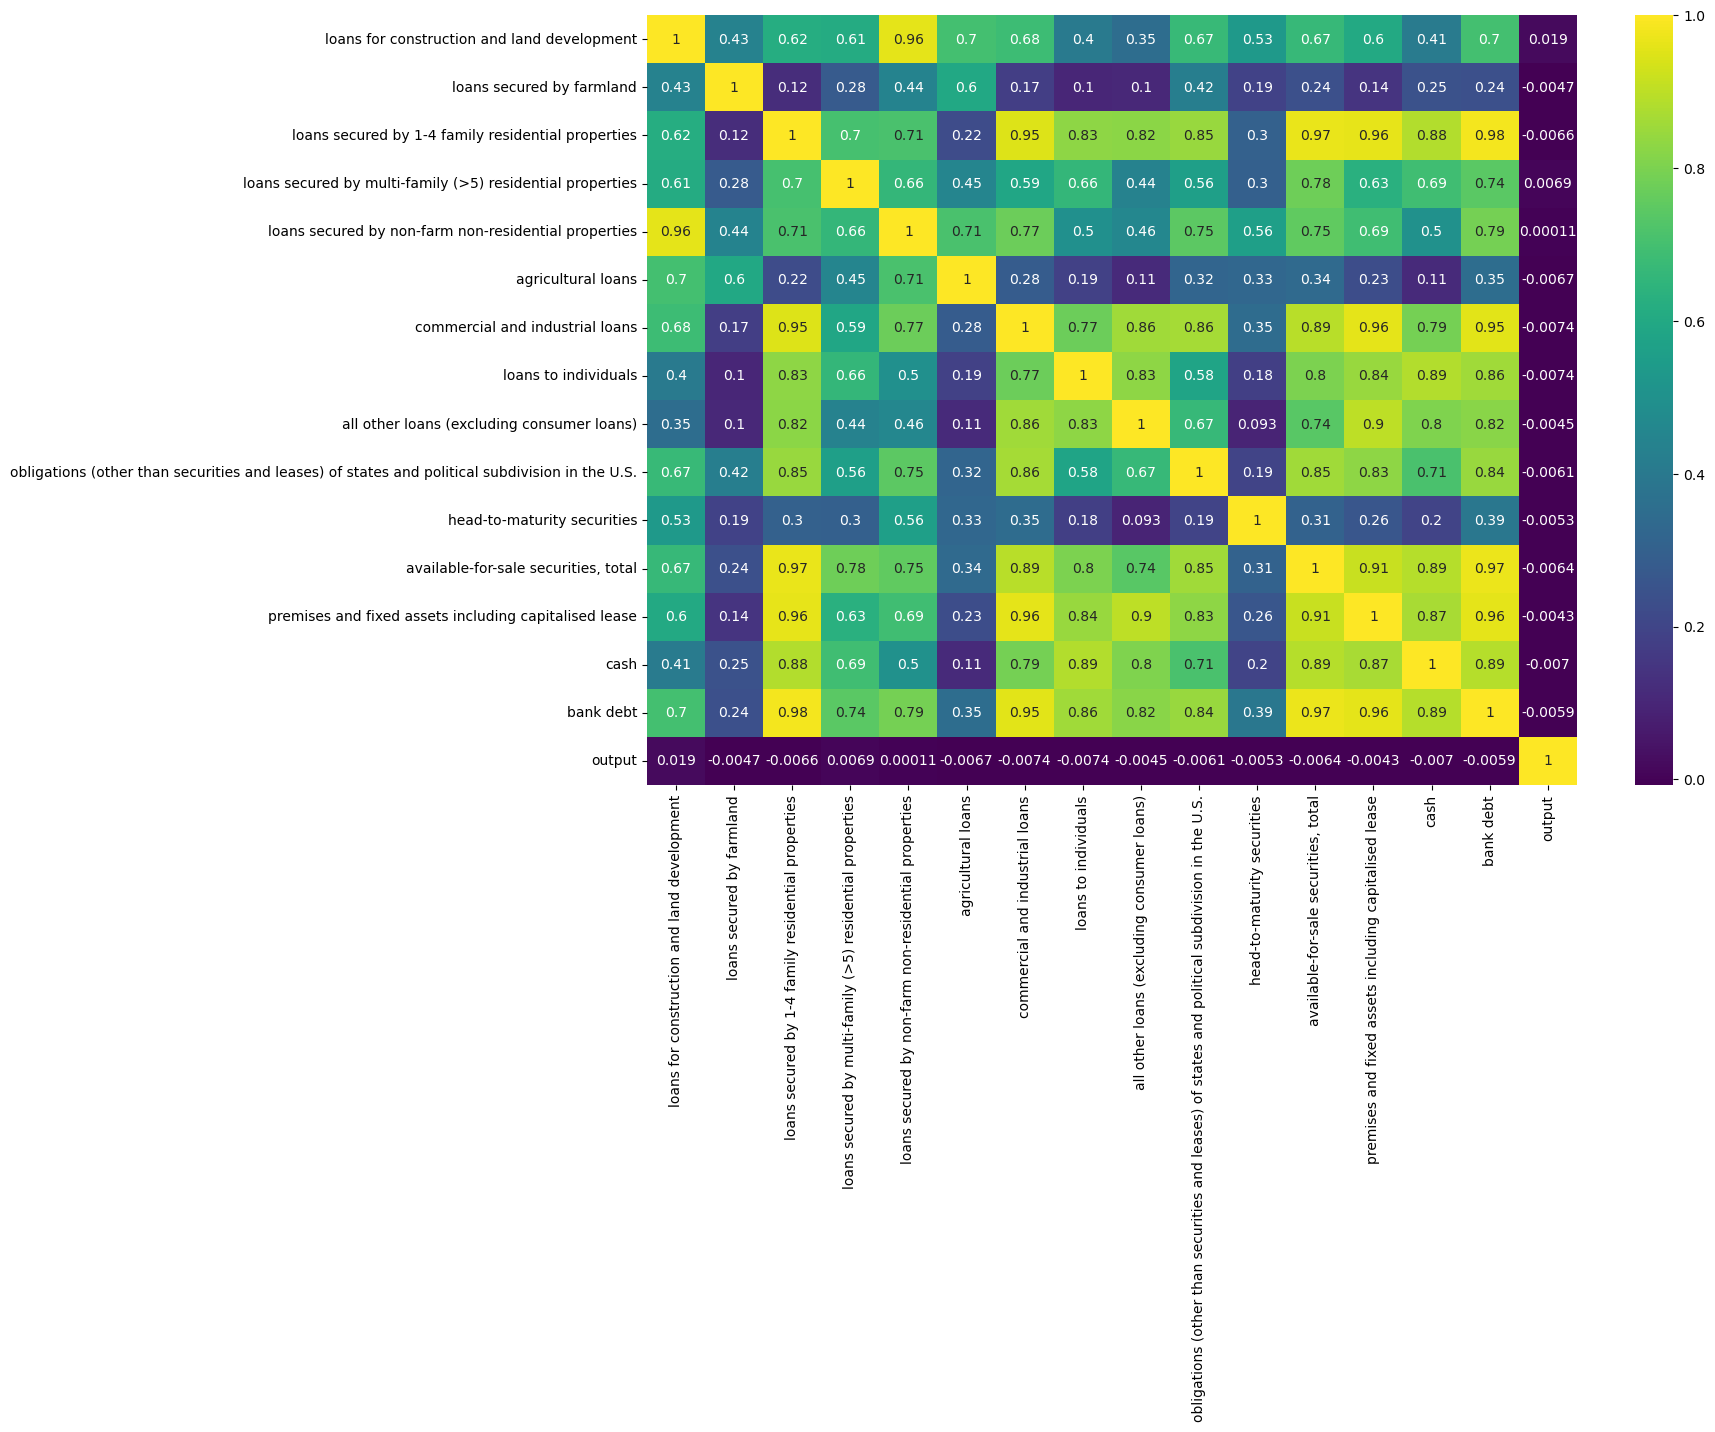

In [63]:
# Plotting correlation plot 
plt.figure(figsize=(15,10))
sns.heatmap(data= df.corr(), annot=True, cmap='viridis')

<AxesSubplot:title={'center':'Correlation with Output'}>

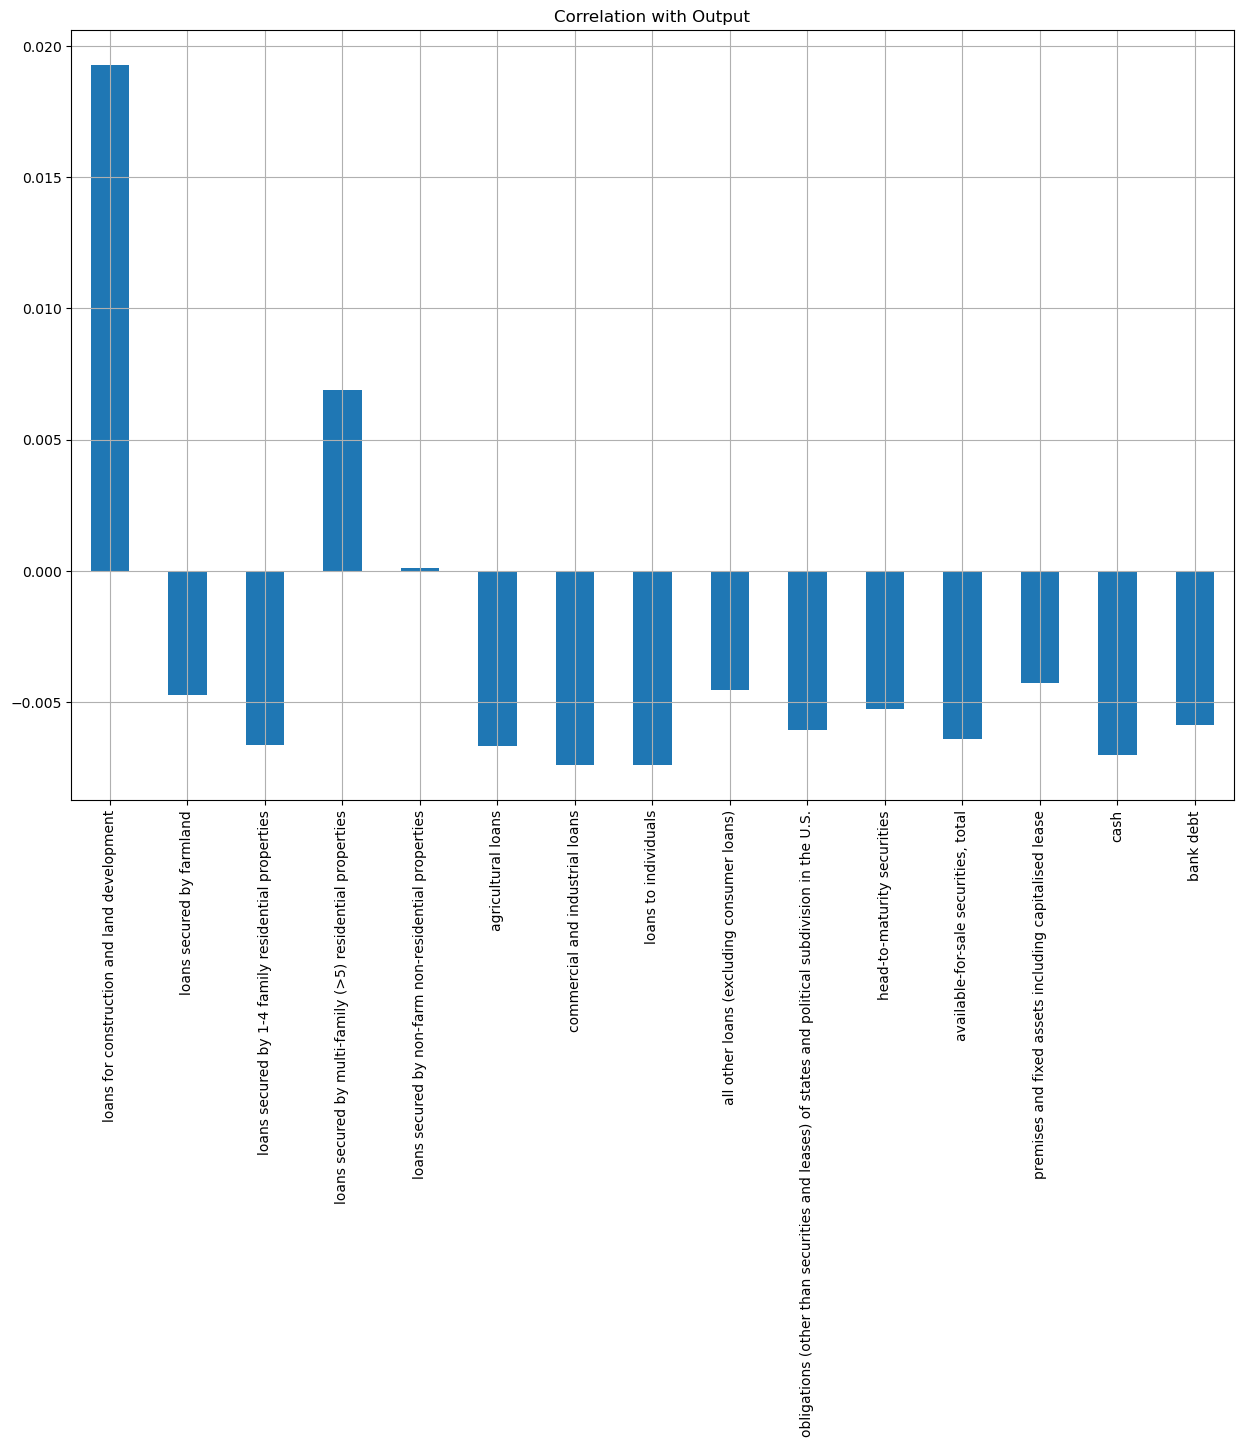

In [64]:
# Plotting correlation of variables with the output(independant) variable
X = df.drop(columns=['output'])
X.corrwith(df.output).plot.bar(figsize = (15, 10), title = "Correlation with Output", fontsize = 10,grid = True)

It is clear that some variables are highly correlated with each other and that we may benefit from excluding some of these classes to make a simpler model. It is also clear that some variables are more highly correlated with the output variable which we are trying to predict.

<AxesSubplot:xlabel='output', ylabel='count'>

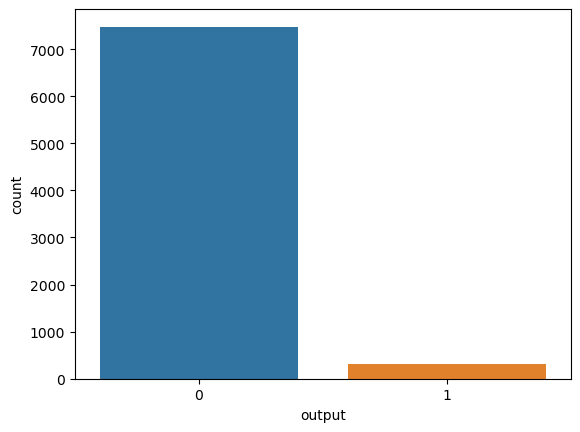

In [8]:
# Plotting the balance of the output classes
sns.countplot(data=df, x='output')

In [9]:
# Printing class balance
df['output'].value_counts()

0    7477
1     306
Name: output, dtype: int64

# LOGISTIC REGRESSION

## LOGISTIC REGRESSION - UNBALANCED DATA

In [10]:
# Separating data from input and output
feature_names = df.iloc[:, 0:15].columns
target = df.iloc[:1, 15:].columns

data_features = df[feature_names]
data_target = df[target]

In [11]:
# Separating the data into training and testing
from sklearn.model_selection import train_test_split
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, train_size = 0.70, test_size = 0.30, random_state = 1)

In [12]:
# Defining the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [13]:
# Training the model
lr.fit(X_train, y_train)

LogisticRegression()

In [14]:
# Defining model function
def RunModel(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train.values.ravel())
    pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, pred)
    return matrix, pred    

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2242
           1       0.34      0.27      0.30        93

    accuracy                           0.95      2335
   macro avg       0.66      0.62      0.64      2335
weighted avg       0.94      0.95      0.95      2335



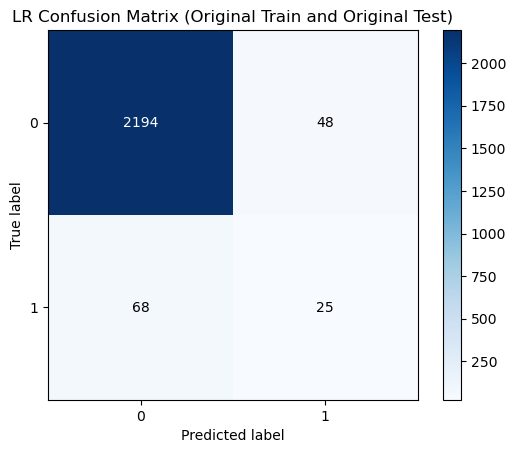

In [15]:
# Classification Report - Model performance measures
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import scikitplot as skplt
cmat, pred = RunModel(lr, X_train, y_train, X_test, y_test)
skplt.metrics.plot_confusion_matrix(y_test, pred, title='LR Confusion Matrix (Original Train and Original Test)')
# Printing classification report
print (classification_report(y_test, pred))

2194 banks classified as non-default and were actually non-default, 45 banks classified as default but that were really non-default (type 1 error), 68 banks classified as non-default but which were default (type 2 error), 25 banks classified as default and were actually default.

Thus, although the accuracy was excellent, the algorithm only managed to correctly identify 25/93 defaults (25%).

Accuracy in a highly unbalanced data set does not represent a correct value for the efficiency of a model.

Initially, a method should be applied to balance the data before taking into account any performance evaluation metrics.

The application of methods for data balancing, such as undersampling and oversampling techniques are widely used in these cases. Changing the sampling makes the algorithm more "sensitive" to bank defaults.

Undersampling is the technique of removing major class records from the sample. In this case, it is necessary to remove random records from the legitimate class (No default), in order to obtain a number of records close to the amount of the minority class (defaults) in order to train the model.

Oversampling is exactly the opposite: it means adding minority class records (defaults) to our training sample, thus increasing the overall proportion of default records. There are methods to generate samples from the minority class, either by duplicating existing records or artificially generating others.

First we will explore using oversampling and then undersampling and compare both methods.

# Exploring reduced feature selection

Before we explore oversampling and undersampling to balance the dataset, we will implement RFE (recursive feature elimination) to reduce the number of features in the dataset.

In RFE, the model is trained on the full set of features and the importance of each feature is determined by the weights assigned to them by the model. The least important features are then eliminated and the model is trained again on the remaining features. This process is repeated iteratively until a specified number of features is reached or until the model performance no longer improves.

RFE is useful because it can help to reduce overfitting by eliminating irrelevant or redundant features, thereby simplifying the model and improving its generalization performance on unseen data. It can also reduce training time and computational costs by focusing on a smaller subset of features.

In [16]:
#Feature selection for 10 features
#Recursive feature elimination
from sklearn.feature_selection import RFE

#Select best feature 
rfe = RFE(lr, n_features_to_select=8)
rfe = rfe.fit(X_train, y_train)

#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]

[False False  True False False  True  True  True False False  True  True
 False  True  True]
[6 4 1 3 2 1 1 1 5 7 1 1 8 1 1]


Index(['loans secured by 1-4 family residential properties',
       'agricultural loans', 'commercial and industrial loans',
       'loans to individuals', 'head-to-maturity securities',
       'available-for-sale securities, total', 'cash', 'bank debt'],
      dtype='object')

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2242
           1       0.25      0.20      0.22        93

    accuracy                           0.94      2335
   macro avg       0.61      0.59      0.60      2335
weighted avg       0.94      0.94      0.94      2335



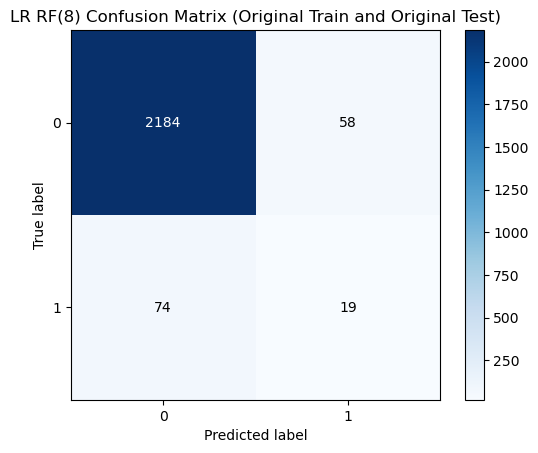

In [17]:
# Applying logistic regression model using reduced feature dataset
lr_reduced_features = LogisticRegression()
cmat, pred = RunModel(lr_reduced_features, X_train[X_train.columns[rfe.support_]], y_train, X_test[X_train.columns[rfe.support_]], y_test)
skplt.metrics.plot_confusion_matrix(y_test, pred, title='LR RF(8) Confusion Matrix (Original Train and Original Test)')
# Printing classification report
print (classification_report(y_test, pred))

In [18]:
#Feature selection for 12 features
#Recursive feature elimination
from sklearn.feature_selection import RFE

#Select best feature 
rfe = RFE(lr, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]

[False False  True  True  True  True  True  True False False  True  True
 False  True  True]
[4 2 1 1 1 1 1 1 3 5 1 1 6 1 1]


Index(['loans secured by 1-4 family residential properties',
       'loans secured by multi-family (>5) residential properties',
       'loans secured by non-farm non-residential properties',
       'agricultural loans', 'commercial and industrial loans',
       'loans to individuals', 'head-to-maturity securities',
       'available-for-sale securities, total', 'cash', 'bank debt'],
      dtype='object')

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2242
           1       0.33      0.25      0.28        93

    accuracy                           0.95      2335
   macro avg       0.65      0.61      0.63      2335
weighted avg       0.94      0.95      0.95      2335



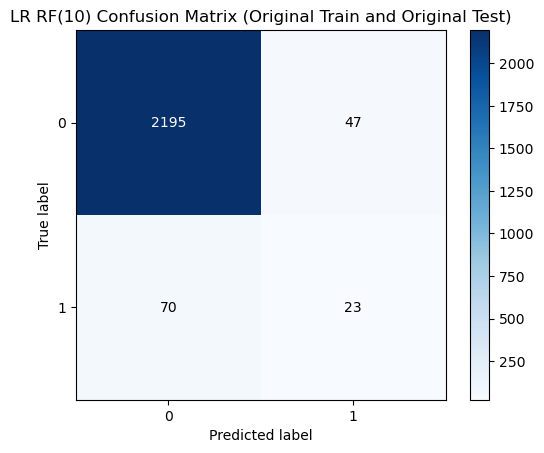

In [19]:
# Applying logistic regression model using reduced feature dataset
lr_reduced_features = LogisticRegression()
cmat, pred = RunModel(lr_reduced_features, X_train[X_train.columns[rfe.support_]], y_train, X_test[X_train.columns[rfe.support_]], y_test)
skplt.metrics.plot_confusion_matrix(y_test, pred, title='LR RF(10) Confusion Matrix (Original Train and Original Test)')
# Printing classification report
print (classification_report(y_test, pred))

Comparing the classification reports for the logistic regressions on the full feature dataset and the reduced feature dataset for 8 and 10 features, we can see that there is a small consistant decrease in the precision, recall and f1-score in the reduced feature datasets. This tradeoff between model performance and model simplicity may be worth it if the dataset being used was extremely large with long computation times, but in our case we will proceed with the full feature dataset. The use of reduced feature sampling will be implemented again when our final model is selected.

## LOGISTIC REGRESSION - BALANCED DATA USING UNDERSAMPLING

In [20]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df.iloc[:, 0:15]
y = df['output']

# Create a random undersampler object
rus = RandomUnderSampler(random_state=42)

# Resample the data using the random undersampler
X_undersampled, Y_undersampled = rus.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_undersampled_train, X_undersampled_test, Y_undersampled_train, Y_undersampled_test = train_test_split(X_undersampled, Y_undersampled, test_size=0.3, random_state=42)

In [21]:
# Printing class balance
Y_undersampled.value_counts()

0    306
1    306
Name: output, dtype: int64

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       104
           1       0.74      0.74      0.74        80

    accuracy                           0.77       184
   macro avg       0.77      0.77      0.77       184
weighted avg       0.77      0.77      0.77       184



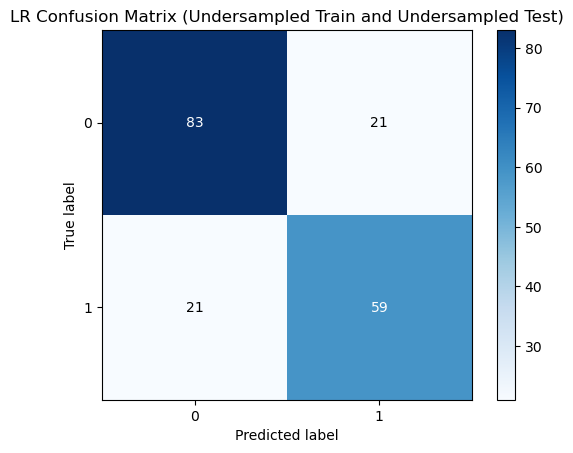

In [22]:
# Using the undersampled classifier for balanced data
lr_undersampled = LogisticRegression()
cmat, pred = RunModel(lr_undersampled, X_undersampled_train, Y_undersampled_train, X_undersampled_test, Y_undersampled_test)
skplt.metrics.plot_confusion_matrix(Y_undersampled_test, pred, title='LR Confusion Matrix (Undersampled Train and Undersampled Test)')
# Printing classification report
print (classification_report(Y_undersampled_test, pred))

Accuracy has decreased, but sensitivity has greatly increased. Looking at the confusion matrix, we can see a much higher percentage of correct classifications of defaults.

Unfortunately, a greater number of default classifications almost always means a correspondingly greater number of non-defaults being classified as defaults.

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      2242
           1       0.15      0.72      0.25        93

    accuracy                           0.83      2335
   macro avg       0.57      0.78      0.58      2335
weighted avg       0.95      0.83      0.88      2335



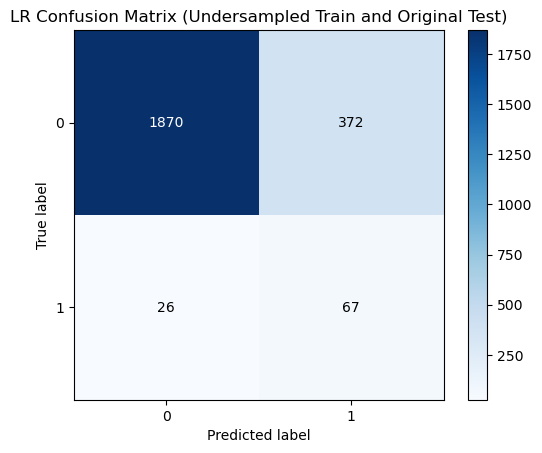

In [23]:
# Using the undersampling classifier for the original data test
lr_undersampled = LogisticRegression()
cmat, pred = RunModel(lr_undersampled, X_undersampled_train, Y_undersampled_train, X_test, y_test)
skplt.metrics.plot_confusion_matrix(y_test, pred, title='LR Confusion Matrix (Undersampled Train and Original Test)')
# Printing classification report
print (classification_report(y_test, pred))

The algorithm was much better at predicting defalts (74 classification errors at the beginning of the project to 22 current), but much worse at incorrectly labeling valid transactions (47 to 500).

## LOGISTIC REGRESSION - BALANCED DATA USING OVERSAMPLING

In [24]:
# Apply oversampling to minority class
# Import necessary libraries
from imblearn.over_sampling import SMOTE

# Define X (features) and y (target variable)
X = df.drop('output', axis=1)
y = df['output']

# Create an instance of SMOTE
smote = SMOTE()

# Resample the dataset using SMOTE
X_oversampled, Y_oversampled = smote.fit_resample(X, y)

# Split the resampled data into train and test sets
X_oversampled_train, X_oversampled_test, Y_oversampled_train, Y_oversampled_test = train_test_split(X_oversampled, Y_oversampled, test_size=0.3)

In [25]:
# Printing class balance
Y_oversampled.value_counts()

1    7477
0    7477
Name: output, dtype: int64

              precision    recall  f1-score   support

           0       0.75      0.87      0.80      2206
           1       0.85      0.72      0.78      2281

    accuracy                           0.79      4487
   macro avg       0.80      0.79      0.79      4487
weighted avg       0.80      0.79      0.79      4487



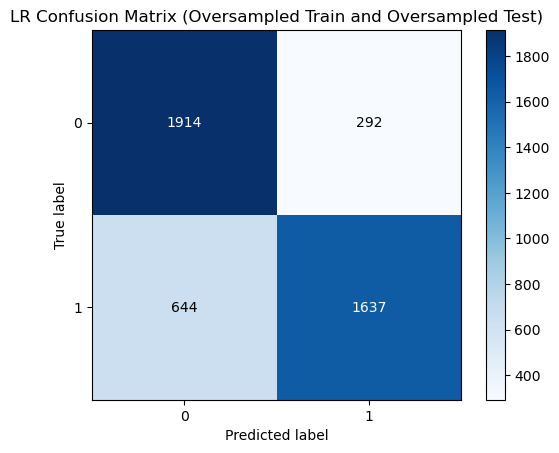

In [26]:
# Using the oversampled classifier for balanced data
lr_oversampled = LogisticRegression()
cmat, pred = RunModel(lr_oversampled, X_oversampled_train, Y_oversampled_train, X_oversampled_test, Y_oversampled_test)
skplt.metrics.plot_confusion_matrix(Y_oversampled_test, pred, title='LR Confusion Matrix (Oversampled Train and Oversampled Test)')
# Printing classification report
print (classification_report(Y_oversampled_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      2242
           1       0.18      0.67      0.28        93

    accuracy                           0.86      2335
   macro avg       0.58      0.77      0.60      2335
weighted avg       0.95      0.86      0.90      2335



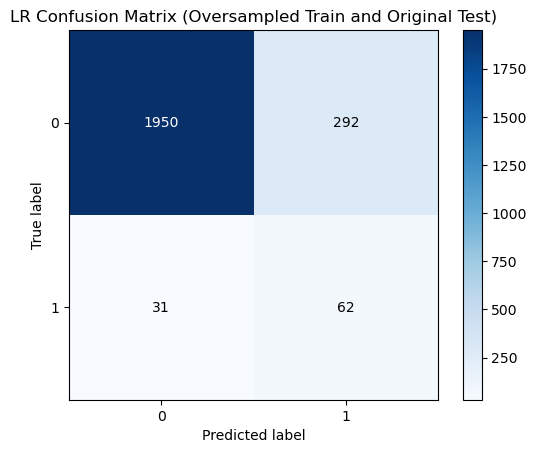

In [27]:
# Using the oversampling classifier for the original data test
lr_oversampled = LogisticRegression()
cmat, pred = RunModel(lr_oversampled, X_oversampled_train, Y_oversampled_train, X_test, y_test)
skplt.metrics.plot_confusion_matrix(y_test, pred, title='LR Confusion Matrix (Oversampled Train and Original Test)')
# Printing classification report
print (classification_report(y_test, pred))

## Exploring normalising the best LR model (oversampled)

              precision    recall  f1-score   support

           0       0.67      0.92      0.77      2248
           1       0.87      0.54      0.66      2239

    accuracy                           0.73      4487
   macro avg       0.77      0.73      0.72      4487
weighted avg       0.77      0.73      0.72      4487



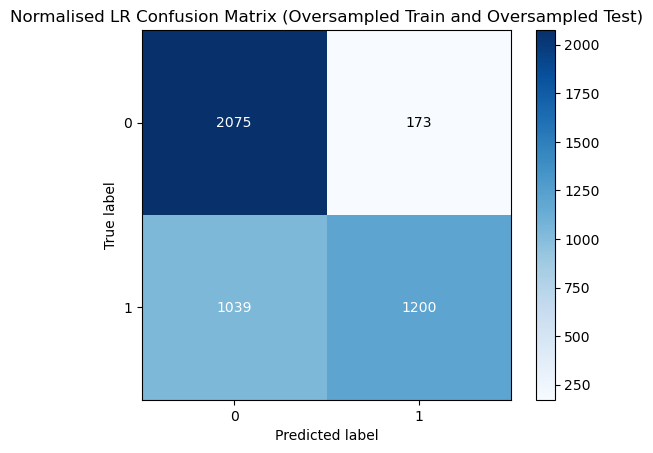

In [28]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Create an instance of SMOTE
smote = SMOTE()

# Resample the dataset using SMOTE
X_oversampled_norm, Y_oversampled_norm = smote.fit_resample(X_norm, y)

# Split the resampled data into train and test sets
X_oversampled_train_norm, X_oversampled_test_norm, Y_oversampled_train_norm, Y_oversampled_test_norm = train_test_split(X_oversampled_norm, Y_oversampled_norm, test_size=0.3)

# Using the oversampled classifier for balanced data
lr_oversampled_norm = LogisticRegression()
cmat, pred = RunModel(lr_oversampled_norm, X_oversampled_train_norm, Y_oversampled_train_norm, X_oversampled_test_norm, Y_oversampled_test_norm)
skplt.metrics.plot_confusion_matrix(Y_oversampled_test_norm, pred, title='Normalised LR Confusion Matrix (Oversampled Train and Oversampled Test)')

# Printing classification report
print (classification_report(Y_oversampled_test_norm, pred))

Normalising the data results in a slight decrease in model performance

# DECISION TREE

## DECISION TREE - UNBALANCED DATA

Classification metrics: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      2242
           1       0.12      0.15      0.14        93

    accuracy                           0.92      2335
   macro avg       0.54      0.55      0.55      2335
weighted avg       0.93      0.92      0.93      2335



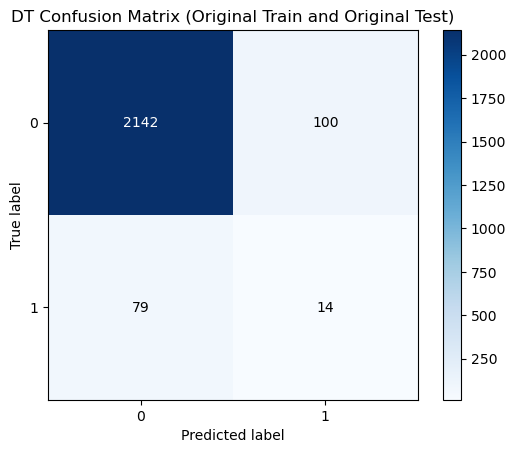

In [29]:
##Build and train model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, pred, title='DT Confusion Matrix (Original Train and Original Test)')
# Evaluate model
print('Classification metrics: \n', classification_report(y_test, pred))

## DECISION TREE -  BALANCED DATA USING OVERSAMPLING

Classification metrics: 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92      2206
           1       0.91      0.94      0.92      2281

    accuracy                           0.92      4487
   macro avg       0.92      0.92      0.92      4487
weighted avg       0.92      0.92      0.92      4487



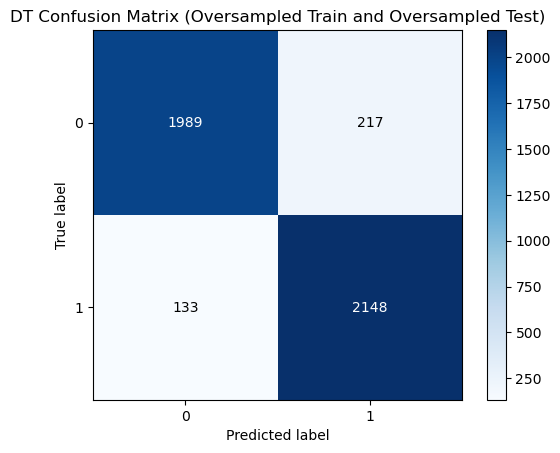

In [30]:
# Build and train model
from sklearn.tree import DecisionTreeClassifier
dt_oversampled = DecisionTreeClassifier()
dt_oversampled.fit(X_oversampled_train, Y_oversampled_train)
# Predict on test data
pred = dt_oversampled.predict(X_oversampled_test)
skplt.metrics.plot_confusion_matrix(Y_oversampled_test, pred, title='DT Confusion Matrix (Oversampled Train and Oversampled Test)')
# Evaluate model
print('Classification metrics: \n', classification_report(Y_oversampled_test, pred))

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99      2242
           1       0.59      0.96      0.73        93

    accuracy                           0.97      2335
   macro avg       0.79      0.96      0.86      2335
weighted avg       0.98      0.97      0.97      2335



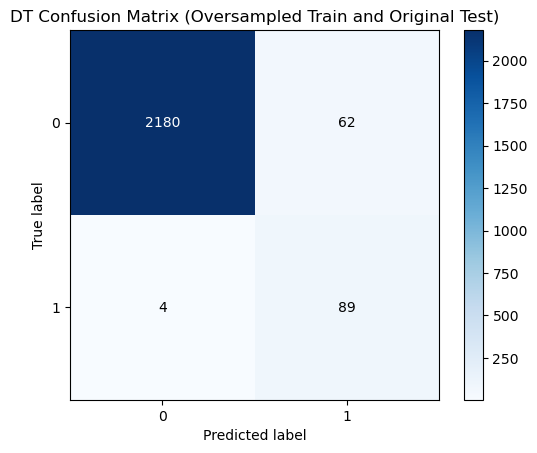

In [31]:
# Using the decision tree classifier for the original data test
pred = dt_oversampled.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, pred, title='DT Confusion Matrix (Oversampled Train and Original Test)')
# Evaluate model
print('Classification metrics: \n', classification_report(y_test, pred))

## DECISION TREE - BALANCED DATA USING UNDERSAMPLING

Classification metrics: 
               precision    recall  f1-score   support

           0       0.78      0.65      0.71       104
           1       0.63      0.76      0.69        80

    accuracy                           0.70       184
   macro avg       0.71      0.71      0.70       184
weighted avg       0.72      0.70      0.70       184



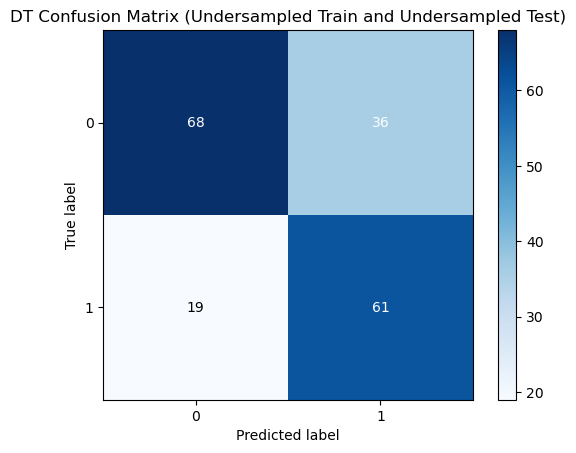

In [32]:
# Using the decision tree classifier for balanced data
# Build and train model
from sklearn.tree import DecisionTreeClassifier
dt_undersampled = DecisionTreeClassifier()
dt_undersampled.fit(X_undersampled_train, Y_undersampled_train)
# Predict on test data
pred = dt_undersampled.predict(X_undersampled_test)
skplt.metrics.plot_confusion_matrix(Y_undersampled_test, pred, title='DT Confusion Matrix (Undersampled Train and Undersampled Test)')
# Evaluate model
print('Classification metrics: \n', classification_report(Y_undersampled_test, pred))

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      0.69      0.81      2242
           1       0.11      0.94      0.20        93

    accuracy                           0.70      2335
   macro avg       0.55      0.81      0.50      2335
weighted avg       0.96      0.70      0.79      2335



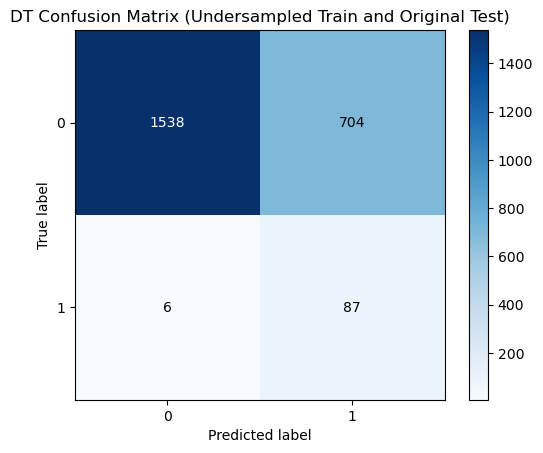

In [33]:
# Using the decision tree classifier for the original data test
pred = dt_undersampled.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, pred, title='DT Confusion Matrix (Undersampled Train and Original Test)')
# Evaluate model
print('Classification metrics: \n', classification_report(y_test, pred))

## RANDOM FOREST

## RANDOM FOREST - UNBALANCED DATA

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2242
           1       0.50      0.03      0.06        93

    accuracy                           0.96      2335
   macro avg       0.73      0.52      0.52      2335
weighted avg       0.94      0.96      0.94      2335



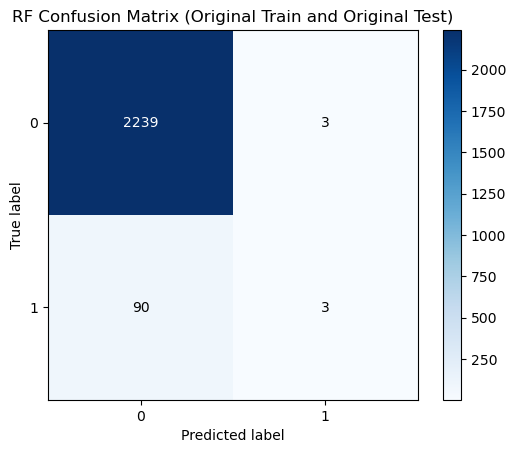

In [34]:
from sklearn.ensemble import RandomForestClassifier
# Creating an instance of the RandomForestClassifier class
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model on the training data
rf.fit(X_train, y_train)

# Making predictions on the testing data
pred = rf.predict(X_test)

# Creating a confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, pred, title='RF Confusion Matrix (Original Train and Original Test)')

# Evaluating the model performance
print(classification_report(y_test, pred))

## RANDOM FOREST - BALANCED DATA USING UNDERSAMPLING

              precision    recall  f1-score   support

           0       0.87      0.73      0.80       104
           1       0.71      0.86      0.78        80

    accuracy                           0.79       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.80      0.79      0.79       184



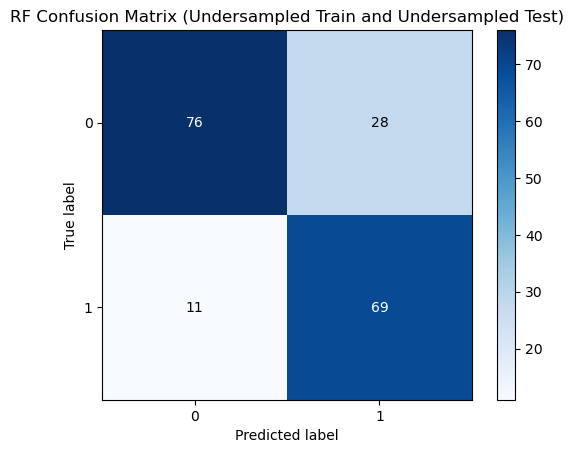

In [35]:
# Now testing the model on balanced data using undersampling
rf_undersampled = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model on the training data
rf_undersampled.fit(X_undersampled_train, Y_undersampled_train)

# Making predictions on the testing data
pred = rf_undersampled.predict(X_undersampled_test)

# Creating a confusion matrix
skplt.metrics.plot_confusion_matrix(Y_undersampled_test, pred, title='RF Confusion Matrix (Undersampled Train and Undersampled Test)')

# Evaluating the model performance
print(classification_report(Y_undersampled_test, pred))

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      0.74      0.85      2242
           1       0.13      0.95      0.23        93

    accuracy                           0.75      2335
   macro avg       0.56      0.84      0.54      2335
weighted avg       0.96      0.75      0.82      2335



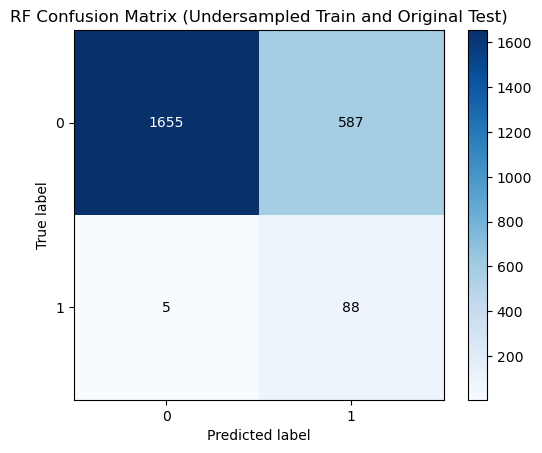

In [36]:
# Validating the model on the original data set
pred = rf_undersampled.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, pred, title='RF Confusion Matrix (Undersampled Train and Original Test)')

# Evaluate model
print('Classification metrics: \n', classification_report(y_test, pred))

## RANDOM FOREST - BALANCED DATA USING OVERSAMPLING

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2206
           1       0.96      0.99      0.97      2281

    accuracy                           0.97      4487
   macro avg       0.97      0.97      0.97      4487
weighted avg       0.97      0.97      0.97      4487



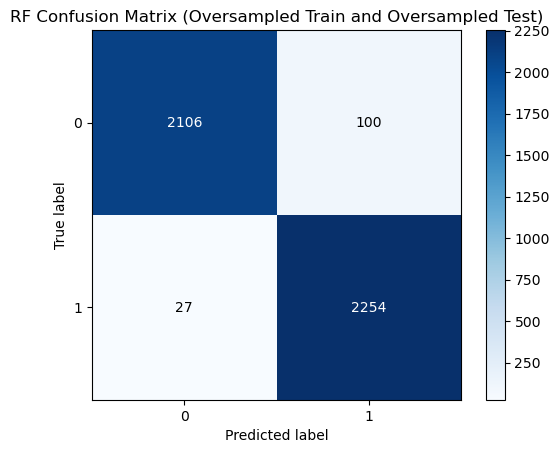

In [37]:
# Now testing the model on balanced data using oversampling
rf_oversampled = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model on the training data
rf_oversampled.fit(X_oversampled_train, Y_oversampled_train)

# Making predictions on the testing data
pred = rf_oversampled.predict(X_oversampled_test)

# Creating a confusion matrix
skplt.metrics.plot_confusion_matrix(Y_oversampled_test, pred, title='RF Confusion Matrix (Oversampled Train and Oversampled Test)')

# Evaluating the model performance
print(classification_report(Y_oversampled_test, pred))

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2242
           1       0.74      1.00      0.85        93

    accuracy                           0.99      2335
   macro avg       0.87      0.99      0.92      2335
weighted avg       0.99      0.99      0.99      2335



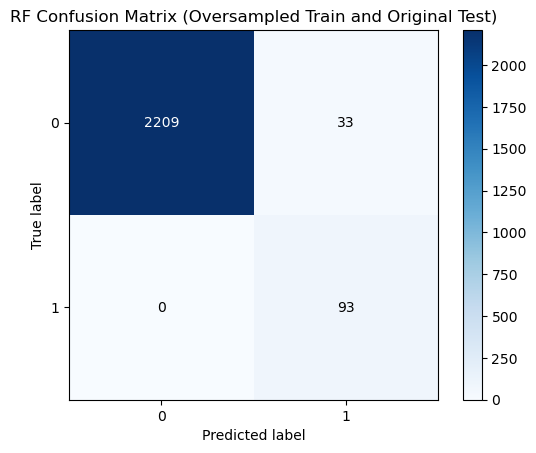

In [38]:
# Validating the model on the original data set
pred = rf_oversampled.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, pred, title='RF Confusion Matrix (Oversampled Train and Original Test)')

# Evaluate model
print('Classification metrics: \n', classification_report(y_test, pred))

# SELECTING THE BEST MODEL FOR FURTHER OPTIMISATION (OVERSAMPLED RANDOM FOREST MODEL)

The random forest model with oversampled data is shown to have the best performance, correctly identifying 92/93 defaults in the test set, with only 34 false positive and 1 false negative out of 2305 test cases. We will now explore ways to optimise the model.

## Exploring standardising the data features

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2239
           1       0.96      0.98      0.97      2248

    accuracy                           0.97      4487
   macro avg       0.97      0.97      0.97      4487
weighted avg       0.97      0.97      0.97      4487



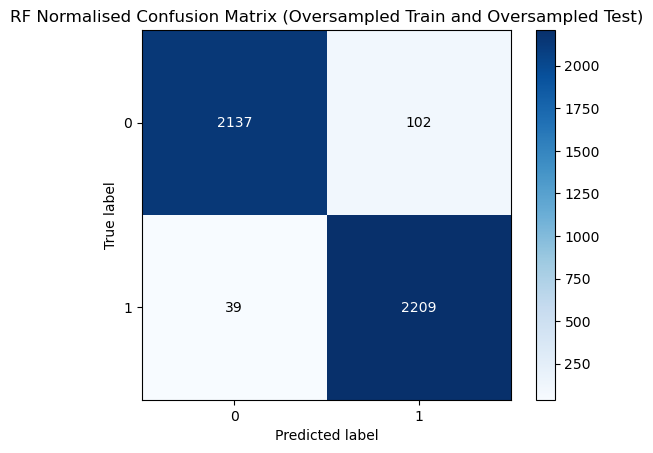

In [39]:
# Normalizing the feature data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Oversampling the data
oversampler = SMOTE(random_state=42)
X_oversampled_scaled, Y_oversampled_scaled = oversampler.fit_resample(X_scaled, y)

# Splitting the data into training and testing sets
X_oversampled_scaled_train, X_oversampled_scaled_test, Y_oversampled_scaled_train, Y_oversampled_scaled_test = train_test_split(X_oversampled_scaled, Y_oversampled_scaled, test_size=0.3, random_state=42)

# Training the model on the training data
rf_oversampled_scaled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_oversampled_scaled.fit(X_oversampled_scaled_train, Y_oversampled_scaled_train)

# Making predictions on the testing data
pred = rf_oversampled_scaled.predict(X_oversampled_scaled_test)

# Creating a confusion matrix
skplt.metrics.plot_confusion_matrix(Y_oversampled_scaled_test, pred, title='RF Standardised Confusion Matrix (Oversampled Train and Oversampled Test)')

# Evaluating the model performance
print(classification_report(Y_oversampled_scaled_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2242
           1       0.06      0.08      0.06        93

    accuracy                           0.91      2335
   macro avg       0.51      0.51      0.51      2335
weighted avg       0.92      0.91      0.92      2335



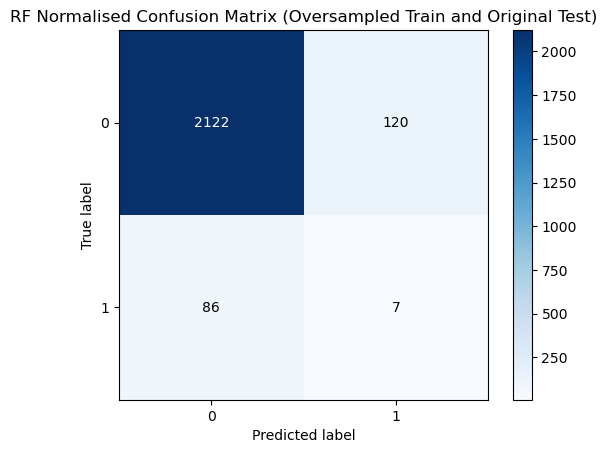

In [40]:
# Making predictions on the original testing data
X_scaled_train, X_scaled_test, Y_scaled_train, Y_scaled_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
pred = rf_oversampled_scaled.predict(X_scaled_test)

# Creating a confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, pred, title='RF Standardised Confusion Matrix (Oversampled Train and Original Test)')

# Evaluating the model performance
print(classification_report(y_test, pred))

In [41]:
len(X_scaled)

7783

## Exploring using reduced features for the oversampled random forest model

In [42]:
#Feature selection for 10 features
#Recursive feature elimination
from sklearn.feature_selection import RFE

#Select best feature 
rfe = RFE(lr, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]

[False False  True  True  True  True  True  True False False  True  True
 False  True  True]
[4 2 1 1 1 1 1 1 3 5 1 1 6 1 1]


Index(['loans secured by 1-4 family residential properties',
       'loans secured by multi-family (>5) residential properties',
       'loans secured by non-farm non-residential properties',
       'agricultural loans', 'commercial and industrial loans',
       'loans to individuals', 'head-to-maturity securities',
       'available-for-sale securities, total', 'cash', 'bank debt'],
      dtype='object')

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2206
           1       0.95      0.99      0.97      2281

    accuracy                           0.97      4487
   macro avg       0.97      0.97      0.97      4487
weighted avg       0.97      0.97      0.97      4487



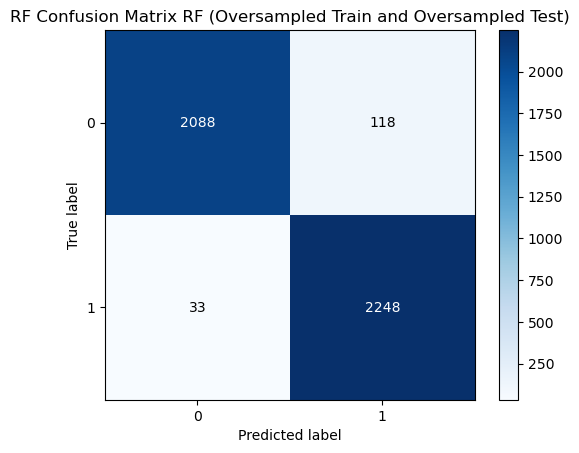

In [43]:
# Repeating oversampled model using reduced feature dataset
rf_oversampled_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model on the training data
rf_oversampled_rf.fit(X_oversampled_train[X_oversampled_train.columns[rfe.support_]], Y_oversampled_train)

# Making predictions on the testing data
pred = rf_oversampled_rf.predict(X_oversampled_test[X_oversampled_test.columns[rfe.support_]])

# Creating a confusion matrix
skplt.metrics.plot_confusion_matrix(Y_oversampled_test, pred, title='RF Confusion Matrix RF (Oversampled Train and Oversampled Test)')

# Evaluating the model performance
print(classification_report(Y_oversampled_test, pred))

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      2242
           1       0.68      0.99      0.81        93

    accuracy                           0.98      2335
   macro avg       0.84      0.99      0.90      2335
weighted avg       0.99      0.98      0.98      2335



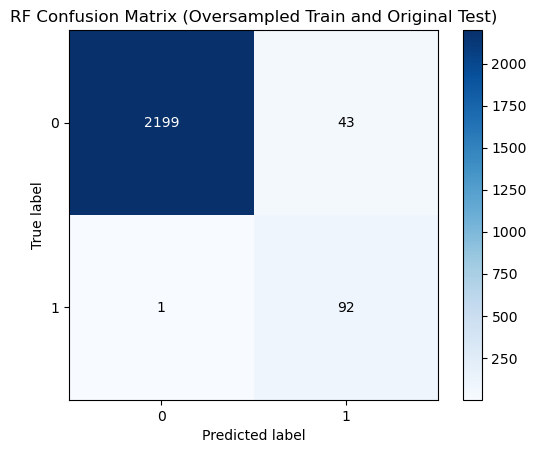

In [44]:
# Validating the model on the original data set
pred = rf_oversampled_rf.predict(X_test[X_test.columns[rfe.support_]])
skplt.metrics.plot_confusion_matrix(y_test, pred, title='RF Confusion Matrix (Oversampled Train and Original Test)')

# Evaluate model
print('Classification metrics: \n', classification_report(y_test, pred))

As shown, the model performs slightly worse with a reduced feature dataset, but may be preferable if the dataset becomes extremely long and computation times are problematic.

This trend continues as the number of features is reduced.

## Exploring optimal parameters for the random forest oversampled model

Best hyperparameters: {'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 score: 0.9637809893033069
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2206
           1       0.96      0.99      0.97      2281

    accuracy                           0.97      4487
   macro avg       0.97      0.97      0.97      4487
weighted avg       0.97      0.97      0.97      4487



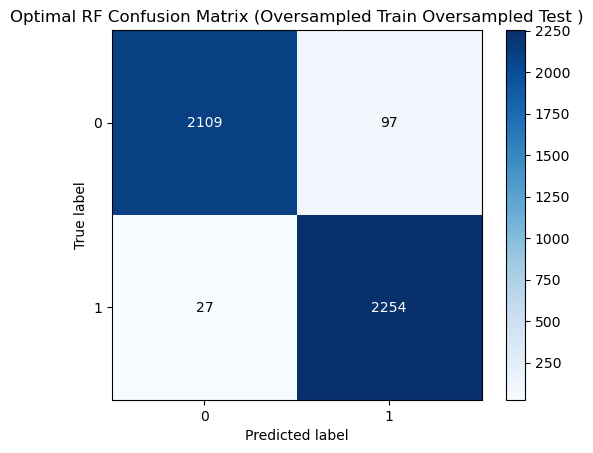

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Define the hyperparameters to explore
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create the random forest model
rf = RandomForestClassifier(random_state=42)

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid=param_grid, scoring='f1_weighted')
grid_search.fit(X_oversampled_train, Y_oversampled_train)

# Print the best hyperparameters and the corresponding F1 score
print('Best hyperparameters:', grid_search.best_params_)
print('Best F1 score:', grid_search.best_score_)

# Plot a confusion matrix for the best model
best_rf = grid_search.best_estimator_
pred = best_rf.predict(X_oversampled_test)
skplt.metrics.plot_confusion_matrix(Y_oversampled_test, pred, title='Optimal RF Confusion Matrix (Oversampled Train Oversampled Test )')

# Evaluate the performance of the best model
print(classification_report(Y_oversampled_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2242
           1       0.75      1.00      0.86        93

    accuracy                           0.99      2335
   macro avg       0.88      0.99      0.93      2335
weighted avg       0.99      0.99      0.99      2335



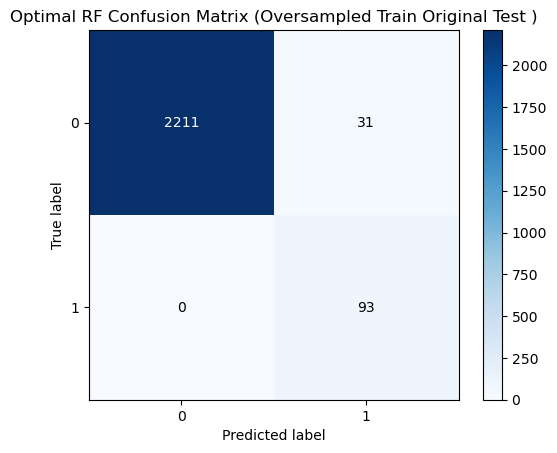

In [59]:
# Predicting on original test data
pred = best_rf.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, pred, title='Optimal RF Confusion Matrix (Oversampled Train Original Test )')

# Evaluate the performance of the best model
print(classification_report(y_test, pred))

AUC score: 0.997


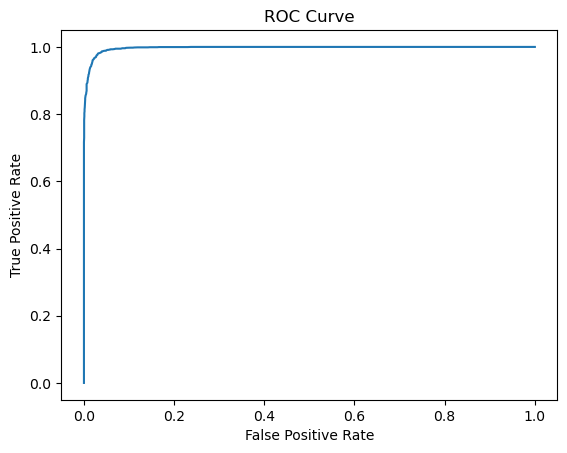

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score

# Generate predicted probabilities for test set
probs = best_rf.predict_proba(X_oversampled_test)[:, 1]

# Calculate false positive rate, true positive rate, and threshold values for ROC curve
fpr, tpr, thresholds = roc_curve(Y_oversampled_test, probs)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Calculate and print AUC score
auc_score = roc_auc_score(Y_oversampled_test, probs)
print(f'AUC score: {auc_score:.3f}')

The "ROC" curve is a probability curve that shows how much the classifier can distinguish between two things, through two parameters: the true-positive rate versus the false-positive rate, that is, the number of times the classifier hit the prediction against the number of times the classifier missed the prediction.

The "AUC" is derived from the "ROC" curve and represents the degree or measure of separability. The AUC summarizes the ROC curve in a single value, calculating the “area under the curve”. The higher the AUC the better the model is in predicting 0s as 0s and 1s as 1s. In this case, the higher the AUC the better the model is in distinguishing between fraudulent and normal transactions. The AUC value ranges from 0.0 to 1.0.

An excellent model has AUC close to 1, which means it has a good measure of separability. A poor model has AUC close to 0, which means that it has the worst measure of separability, that is, it is predicting 0s as 1s and 1s as 0s. And when the AUC is 0.5, it means that the model has no class separation capability. 

As shown above with an AUC of 0.997, the model performance is excellent at predicting and classifying between default and non-defaults.

# 2. EQUITY RETURN ANALYSIS

## DATA PROCESSING

In [525]:
# Importing data
csv_file2 = "C:/Users/samme/Desktop/UCL/Machine Learning/48_Industry_Portfolios_daily.CSV"
df2 = pd.read_csv(csv_file2, header=None)

# Selecting market cap weighted returns
df2 = df2.head(24100)

# Setting row index as the datetime
df2 = df2.set_index(df2.iloc[:,0])
df2.index = pd.to_datetime(df2.index.astype(str), format='%Y%m%d')


# Creating new header of industry names
new_header = df2.iloc[0]

# Setting new header as the column names
df2 = df2[1:]
df2.columns = new_header

# Removing first column
df2 = df2.drop(df2.columns[0], axis=1)

# # Remove spaces in column names
df2.rename(columns=lambda x: x.replace(' ', ''), inplace=True)

# # Convert string entries ('NaN') to NaN values (type float)
df2 = df2.apply(pd.to_numeric, errors='coerce')

# # # Removing NaN values to clean dataset (and reduce size)
df2.dropna(inplace=True)

In [526]:
# Visualised processed dataframe
df2

NaT,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
0,,,,,,,,,,,,,,,,,,,,,
1969-07-01,0.54,0.55,-0.19,0.43,0.84,0.91,1.15,-0.04,0.69,0.38,...,0.29,0.81,0.39,0.43,1.36,0.20,0.30,1.44,0.07,3.69
1969-07-02,0.89,1.27,0.51,1.02,0.95,2.44,0.35,0.28,0.83,0.48,...,1.71,0.76,1.27,0.08,1.37,1.42,0.72,1.74,0.16,-0.04
1969-07-03,-0.17,0.69,0.57,1.49,-0.02,1.51,0.51,0.61,0.75,0.65,...,1.01,0.68,0.96,0.12,1.38,2.24,-0.21,1.39,1.35,2.58
1969-07-07,1.27,-0.65,-0.61,0.42,-0.26,-1.07,-1.84,0.30,-0.52,-0.44,...,-0.47,-1.21,-0.42,-0.51,-0.66,-0.74,-1.52,-2.33,-0.86,-2.26
1969-07-08,-0.71,-0.56,-0.94,-0.21,-1.36,-2.04,-2.36,-0.66,-1.38,-1.77,...,-1.39,-1.35,-1.36,-1.29,-2.48,-0.88,-1.39,-1.90,-1.54,-1.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-25,-0.19,-0.16,-0.62,-0.59,-1.06,0.72,-0.92,-0.34,-0.27,1.12,...,-0.56,-1.73,-0.45,0.00,-0.68,-0.20,-0.02,-1.24,-0.81,-0.79
2017-10-26,0.01,-0.20,0.45,0.26,1.30,0.37,0.17,0.18,0.40,1.45,...,0.29,0.91,-0.48,0.03,1.08,0.76,0.99,1.06,0.70,0.04
2017-10-27,0.09,0.12,-0.32,-0.36,-1.10,-1.20,1.04,-0.54,-0.59,-0.57,...,-0.09,-0.26,-1.46,2.79,0.19,0.29,0.32,-0.04,-0.12,-0.55


In [527]:
#from sklearn.preprocessing import MinMaxScaler
# calculate the mean and standard deviation of each industry
#mean = df2.mean()
#std = df2.std()

# # standardise the dataframe by subtracting the mean and dividing by the standard deviation
# df2_standardised = (df2 - mean) / std
# # normalise the dataframe using minmaxscaler
# scaler = MinMaxScaler()
# df2_normalised = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns, index=df2.index)

# Subset the data for the given range of rows
df2_2000 = df2['2000-01-01':'2000-12-31']

# Calculate mean return and mean standard deviation for each industry
mean_returns = df2_2000.mean()
mean_std_devs = df2_2000.std()

# Create a new DataFrame with mean return and mean standard deviation
industry_stats = pd.DataFrame({'mean_return': mean_returns, 'std_dev': mean_std_devs})

# Standardise the mean return and mean standard deviation
scaler = StandardScaler()
industry_stats_standardised = scaler.fit_transform(industry_stats)
data_2000 = pd.DataFrame(industry_stats_standardised, columns=['mean_return', 'std_dev'], index=industry_stats.index)

In [528]:
data_2000

,mean_return,std_dev
NaT,,
Agric,-0.297048,-1.014474
Food,0.474737,-0.954610
Soda,0.747999,0.693517
Beer,0.397936,0.026265
Smoke,2.389627,1.119910
Toys,-0.685512,-0.656955
Fun,-0.705398,0.585614
Books,-0.187675,0.071742
Hshld,-0.783228,0.053180


# KMEANS CLUSTERING

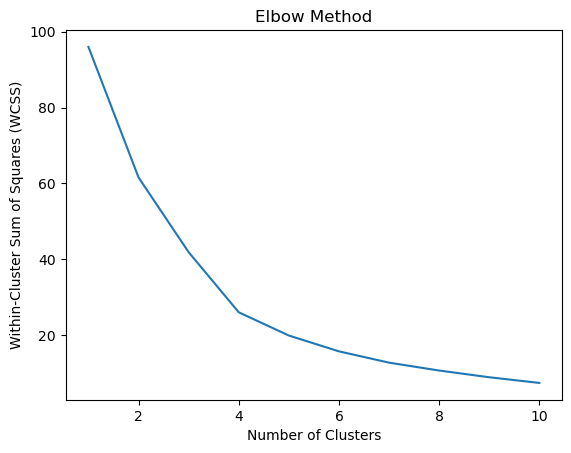

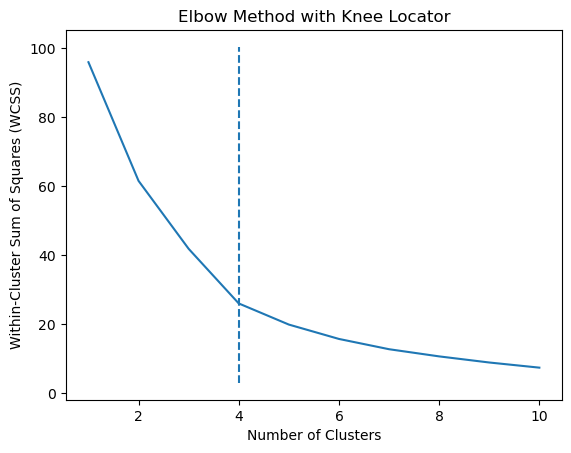

Knee point detected at k = 4


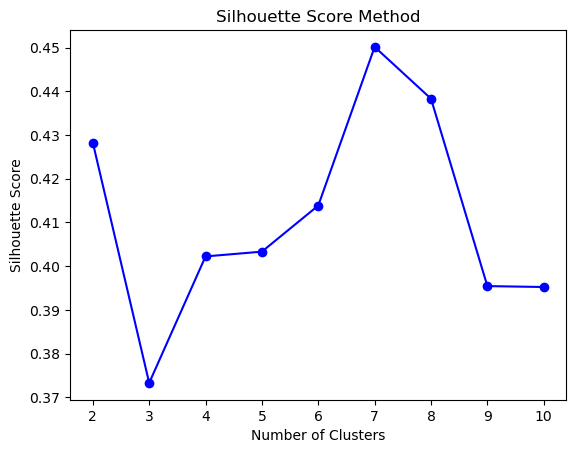

In [529]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Create empty list to store WCSS values for each value of k
wcss = []

# Loop over values of k from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_2000)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

from kneed import KneeLocator

# Create a KneeLocator object to find the knee point of the curve
knee = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')

# Plot the WCSS values against the number of clusters with the knee point marked
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method with Knee Locator')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.vlines(knee.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

# Print the value of k at the knee point
print("Knee point detected at k =", knee.knee)

from sklearn.metrics import silhouette_score

sil_scores = []
range_clusters = range(2, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k).fit(data_2000[['mean_return', 'std_dev']])
    labels = kmeans.labels_
    sil_scores.append(silhouette_score(data_2000[['mean_return', 'std_dev']], labels))

plt.plot(range_clusters, sil_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

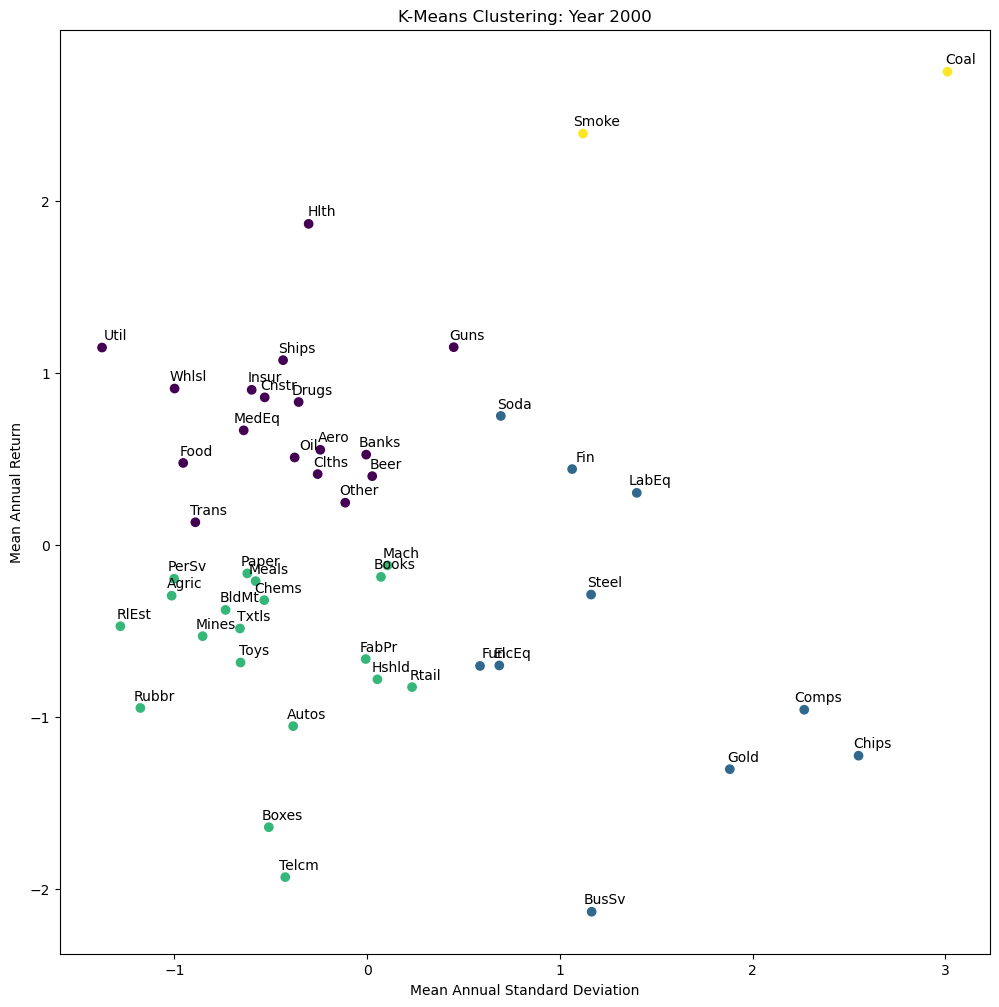

In [631]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
# Use k-means clustering to cluster the industries into three groups
kmeans = KMeans(n_clusters=4).fit(data_2000)

# Add cluster labels to the data dataframe
data_2000['cluster'] = kmeans.labels_

# Printing silhouette_score
k_means_silscore = silhouette_score(data_2000[['mean_return', 'std_dev']], kmeans.labels_)
k_means_calscore = calinski_harabasz_score(data_2000[['mean_return', 'std_dev']], kmeans.labels_)

# Plot the mean annual return vs the mean annual standard deviation with different colors for each cluster
fig, ax = plt.subplots(figsize=(12,12))
plt.scatter(data_2000['std_dev'], data_2000['mean_return'], c=data_2000['cluster'])
plt.xlabel('Mean Annual Standard Deviation')
plt.ylabel('Mean Annual Return')
plt.title('K-Means Clustering: Year 2000')

# Add labels for each point
offset = 0.07
for i, row in data_2000.iterrows():
    plt.text(row['std_dev'] + offset, row['mean_return'] + offset, i, ha='center', va='center')

plt.show()

## HIERARCHICAL CLUSTERING

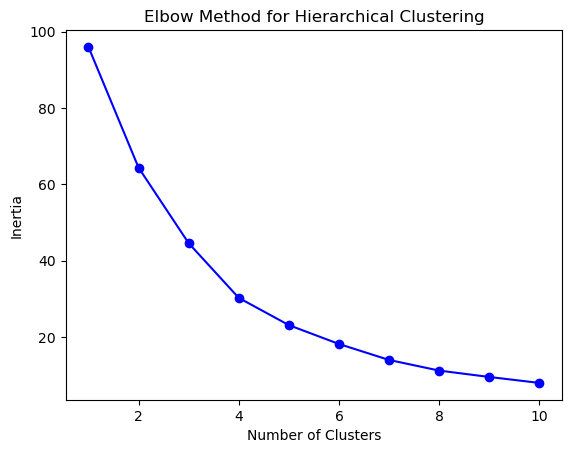

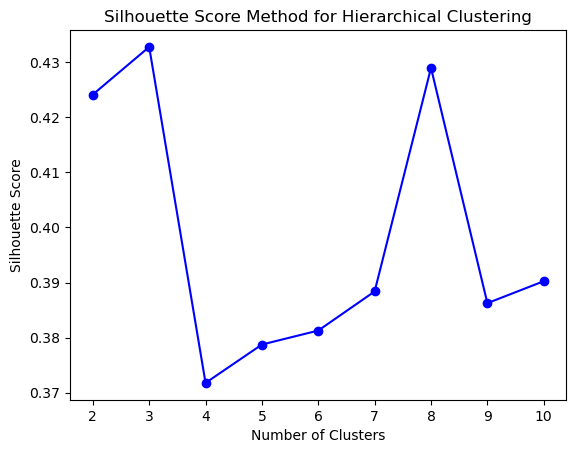

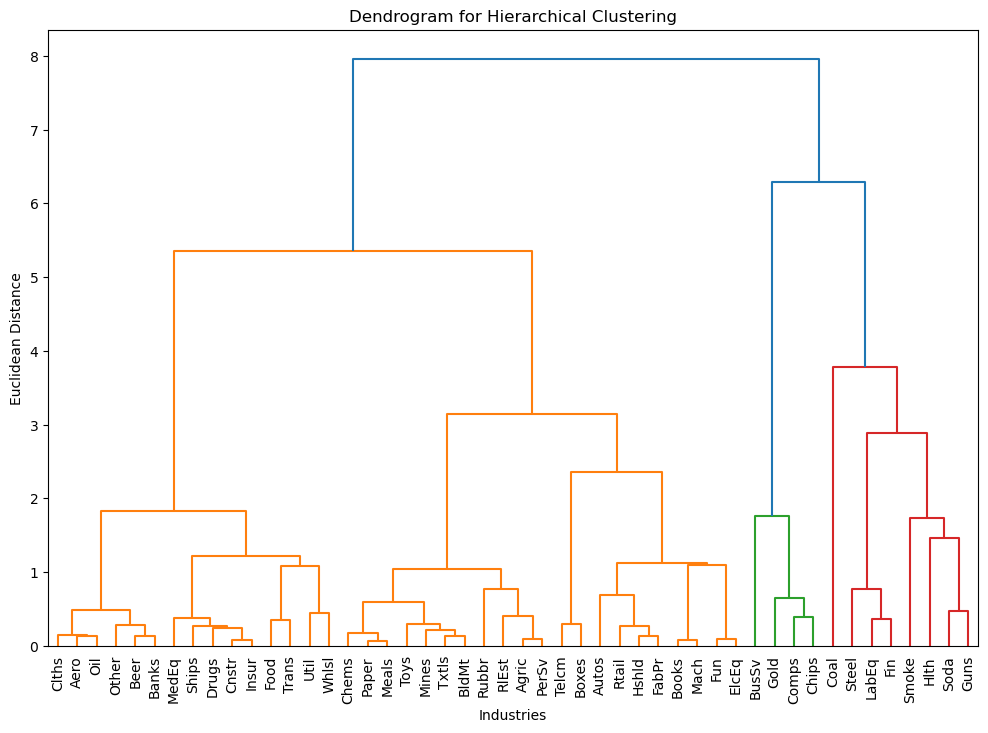

In [517]:
# Elbow Method
inertias = []
range_clusters = range(1, 11)

for k in range_clusters:
    agg_cluster = AgglomerativeClustering(n_clusters=k).fit(data_2000[['mean_return', 'std_dev']])
    labels = agg_cluster.labels_
    
    inertia = 0
    for i in range(k):
        cluster_points = data_2000[labels == i][['mean_return', 'std_dev']]
        centroid = cluster_points.mean().values
        inertia += np.sum((cluster_points - centroid) ** 2).sum()
    
    inertias.append(inertia)

plt.plot(range_clusters, inertias, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Hierarchical Clustering')
plt.show()

# Silhouette Score
sil_scores = []
range_clusters = range(2, 11)

for k in range_clusters:
    agg_cluster = AgglomerativeClustering(n_clusters=k).fit(data_2000[['mean_return', 'std_dev']])
    labels = agg_cluster.labels_
    sil_scores.append(silhouette_score(data_2000[['mean_return', 'std_dev']], labels))

plt.plot(range_clusters, sil_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method for Hierarchical Clustering')
plt.show()

# Plotting Dendrogram
Z = linkage(data_2000[['mean_return', 'std_dev']], method='ward')
fig, ax = plt.subplots(figsize=(12, 8))
dendrogram(Z, labels=data_2000.index, leaf_rotation=90, leaf_font_size=10)
plt.xlabel('Industries')
plt.ylabel('Euclidean Distance')
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

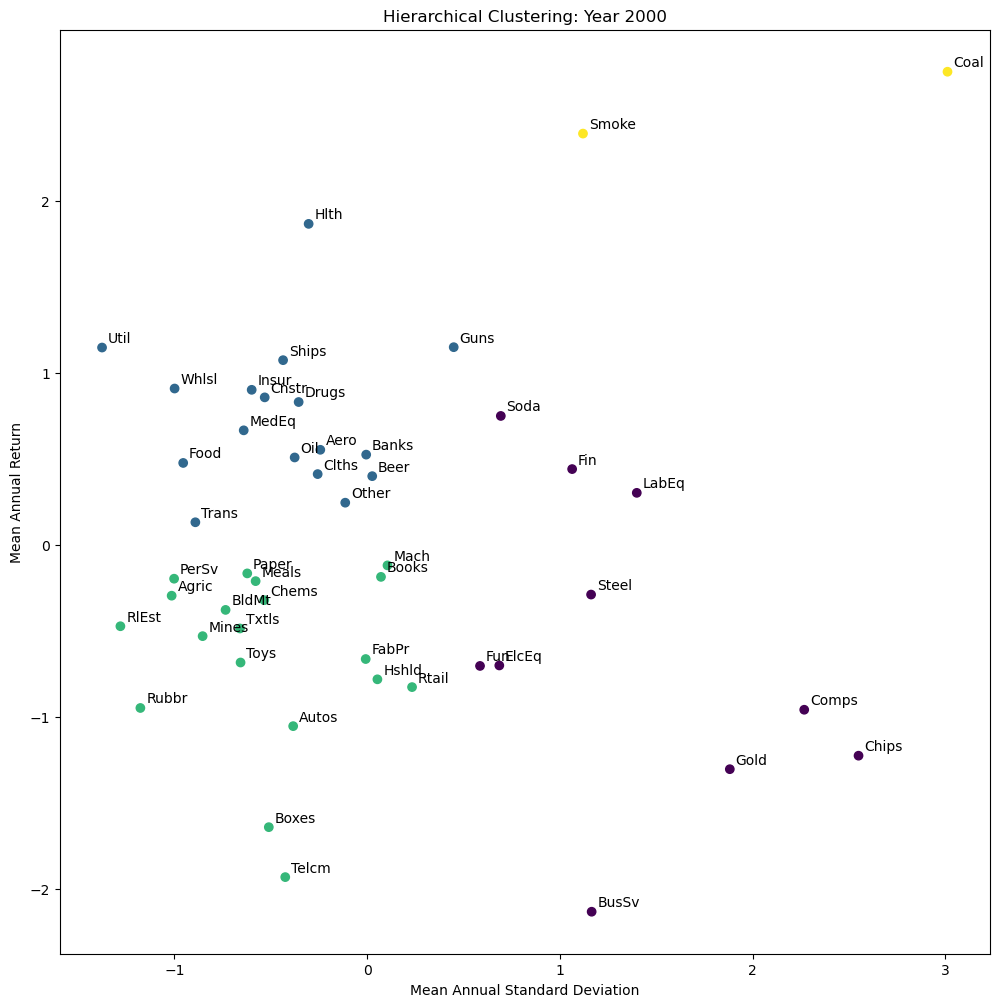

In [632]:
# Use hierarchical clustering to cluster the industries into three groups
from sklearn.cluster import AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=4).fit(data_2000)

# Add cluster labels to the data dataframe
data_2000['cluster'] = agg_cluster.labels_

hier_silscore = silhouette_score(data_2000[['mean_return', 'std_dev']], agg_cluster.labels_)
hier_calscore = calinski_harabasz_score(data_2000[['mean_return', 'std_dev']], agg_cluster.labels_)


# Plot the mean annual return vs the mean annual standard deviation with different colors for each cluster
fig, ax = plt.subplots(figsize=(12,12))
plt.scatter(data_2000['std_dev'], data_2000['mean_return'], c=data_2000['cluster'])
plt.xlabel('Mean Annual Standard Deviation')
plt.ylabel('Mean Annual Return')
plt.title('Hierarchical Clustering: Year 2000')

# Add point labels
offset = 0.03
for i, industry in enumerate(data_2000.index):
    ax.annotate(industry, (data_2000['std_dev'][i] + offset, data_2000['mean_return'][i] + offset))

plt.show()

## SELECTING THE BEST CLUSTERING MODEL

In [535]:
# Print the silhouette score for each model
print('KMeans silhouette score: ', k_means_silscore)
print('Hierarchical silhouette score: ', hier_silscore)

print('KMeans calinski_harabasz_score score: ', k_means_calscore)
print('Hierarchical calinski_harabasz_score score: ', hier_calscore)

KMeans silhouette score:  0.39243764696984745
Hierarchical silhouette score:  0.39243764696984745
KMeans calinski_harabasz_score score:  37.00192651186196
Hierarchical calinski_harabasz_score score:  37.00192651186196


## CLUSTERING COMPARISON: MARKET CONDITIONS

In [574]:
import yfinance as yf

# Define the ticker symbol
tickerSymbol = '^NYA'

# Define the start and end dates for the data
start_date = '1965-01-01'
end_date = '2021-12-31'

# Download the data from Yahoo Finance API
tickerData = yf.Ticker(tickerSymbol)
price_data = tickerData.history(start=start_date, end=end_date, interval='1mo')

# Compute the monthly returns
monthly_returns = price_data['Close'].pct_change()

# Compute the annual returns for each year
annual_returns = (monthly_returns.groupby(pd.Grouper(freq='Y')).apply(lambda x: (1+x).prod() - 1))*100

# Save the annual returns to a new dataframe
annual_returns_df = pd.DataFrame({'Annual Returns': annual_returns})

# Print the first few rows of the annual returns dataframe
print(annual_returns_df.tail(30))

                           Annual Returns
Date                                     
1992-12-31 00:00:00-05:00        4.694064
1993-12-31 00:00:00-05:00        7.855367
1994-12-31 00:00:00-05:00       -3.141877
1995-12-31 00:00:00-05:00       31.310362
1996-12-31 00:00:00-05:00       19.055435
1997-12-31 00:00:00-05:00       30.306146
1998-12-31 00:00:00-05:00       16.553354
1999-12-31 00:00:00-05:00        9.145656
2000-12-31 00:00:00-05:00        1.010307
2001-12-31 00:00:00-05:00      -10.210533
2002-12-31 00:00:00-05:00      -19.825414
2003-12-31 00:00:00-05:00       29.280000
2004-12-31 00:00:00-05:00       12.160583
2005-12-31 00:00:00-05:00        6.950151
2006-12-31 00:00:00-05:00       17.862758
2007-12-31 00:00:00-05:00        6.579489
2008-12-31 00:00:00-05:00      -40.894656
2009-12-31 00:00:00-05:00       24.802811
2010-12-31 00:00:00-05:00       10.842928
2011-12-31 00:00:00-05:00       -6.114880
2012-12-31 00:00:00-05:00       12.925988
2013-12-31 00:00:00-05:00       23

In [608]:
# Subset the data for the given range of rows
df2_1995 = df2['1995-01-01':'1995-12-31']
df2_1997 = df2['1997-01-01':'1997-12-31']

# Calculate mean return and mean standard deviation for each industry
mean_returns_1995 = df2_1995.mean()
mean_std_devs_1995 = df2_1995.std()
mean_returns_1997 = df2_1997.mean()
mean_std_devs_1997 = df2_1997.std()

# Create a new DataFrame with mean return and mean standard deviation
industry_stats_1995 = pd.DataFrame({'mean_return': mean_returns_1995, 'std_dev': mean_std_devs_1995})
industry_stats_1997 = pd.DataFrame({'mean_return': mean_returns_1997, 'std_dev': mean_std_devs_1997})

# Standardise the mean return and mean standard deviation
scaler = StandardScaler()
industry_stats_standardised_1995 = scaler.fit_transform(industry_stats_1995)
data_1995 = pd.DataFrame(industry_stats_standardised_1995, columns=['mean_return', 'std_dev'], index=industry_stats_1995.index)

industry_stats_standardised_1997 = scaler.fit_transform(industry_stats_1997)
data_1997 = pd.DataFrame(industry_stats_standardised_1997, columns=['mean_return', 'std_dev'], index=industry_stats_1997.index)

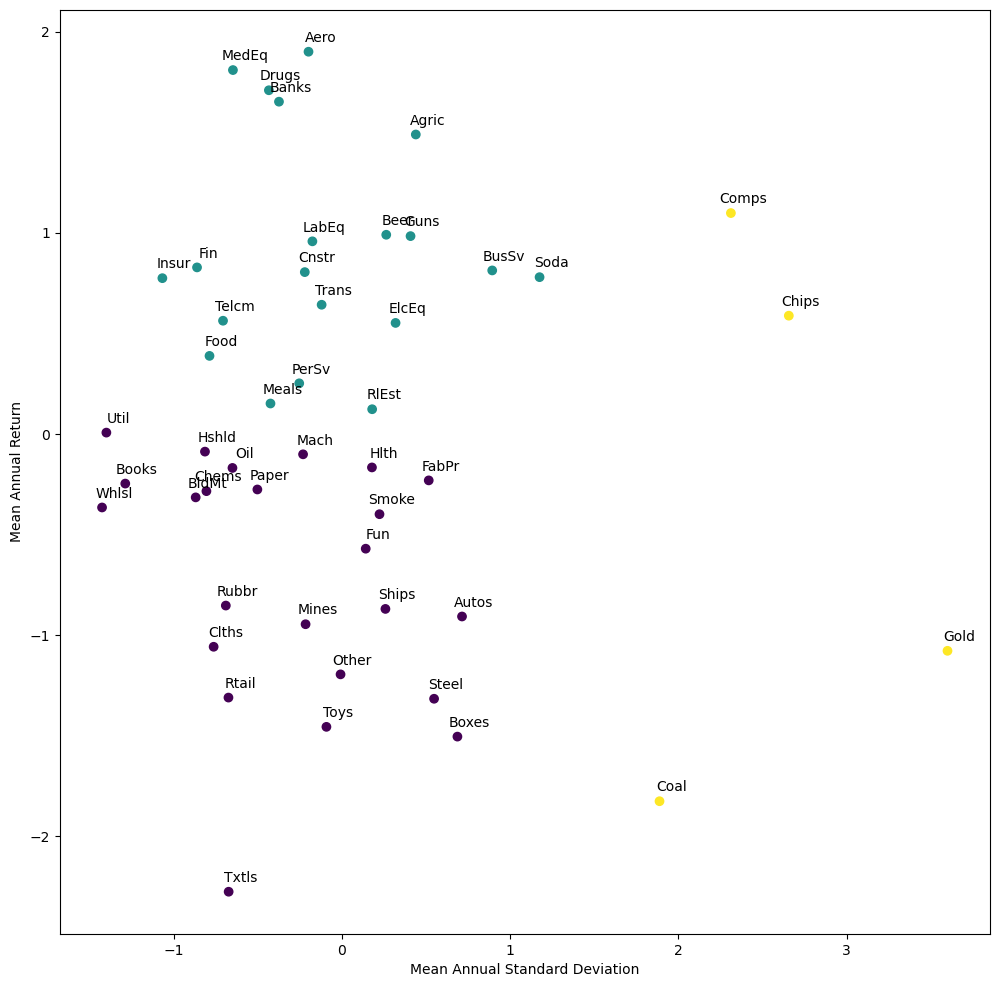

In [609]:
# 1995
# Use k-means clustering to cluster the industries into three groups
kmeans_1995 = KMeans(n_clusters=3).fit(data_1995)

# Add cluster labels to the data dataframe
data_1995['cluster'] = kmeans_1995.labels_

# Plot the mean annual return vs the mean annual standard deviation with different colors for each cluster
fig, ax = plt.subplots(figsize=(12,12))
plt.scatter(data_1995['std_dev'], data_1995['mean_return'], c=data_1995['cluster'])
plt.xlabel('Mean Annual Standard Deviation')
plt.ylabel('Mean Annual Return')

# Add labels for each point
offset = 0.07
for i, row in data_1995.iterrows():
    plt.text(row['std_dev'] + offset, row['mean_return'] + offset, i, ha='center', va='center')

plt.show()

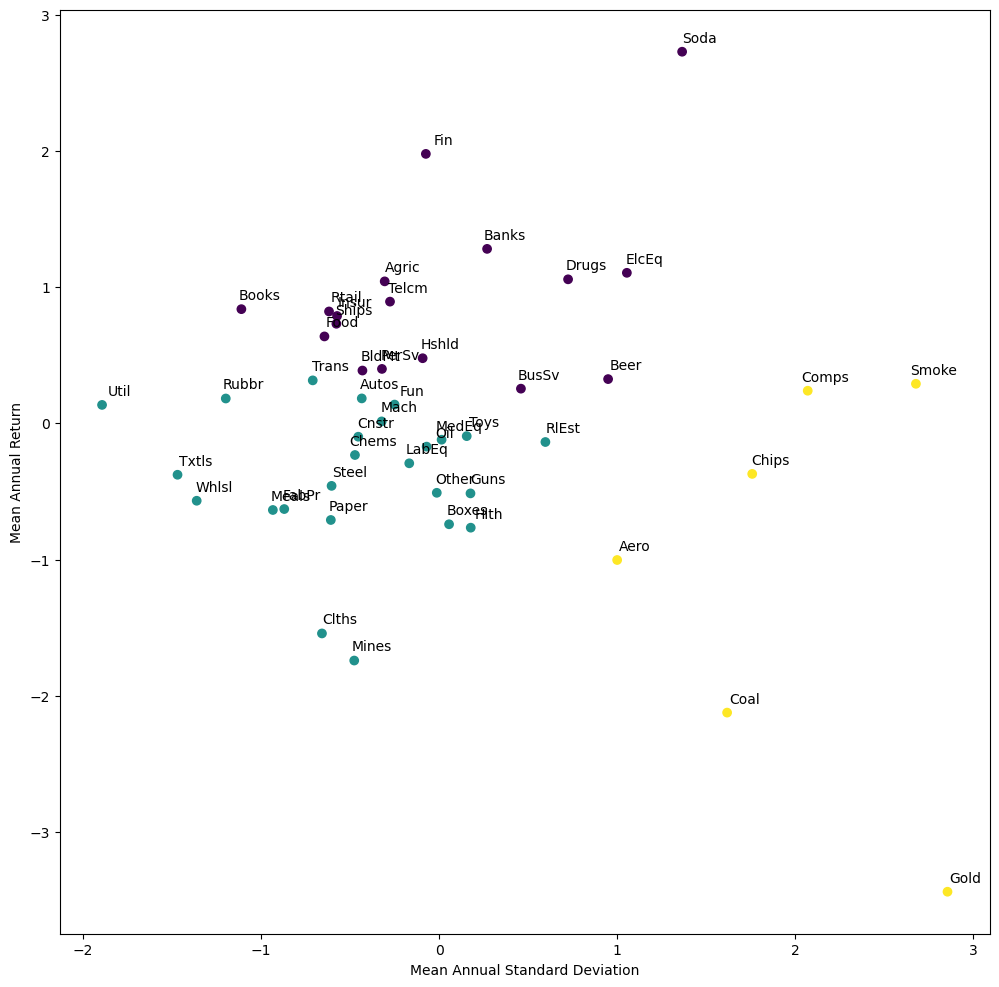

In [610]:
# 1997
# Use k-means clustering to cluster the industries into three groups
kmeans_1997 = KMeans(n_clusters=3).fit(data_1997)

# Add cluster labels to the data dataframe
data_1997['cluster'] = kmeans_1997.labels_

# Plot the mean annual return vs the mean annual standard deviation with different colors for each cluster
fig, ax = plt.subplots(figsize=(12,12))
plt.scatter(data_1997['std_dev'], data_1997['mean_return'], c=data_1997['cluster'])
plt.xlabel('Mean Annual Standard Deviation')
plt.ylabel('Mean Annual Return')

# Add labels for each point
offset = 0.1
for i, row in data_1997.iterrows():
    plt.text(row['std_dev'] + offset, row['mean_return'] + offset, i, ha='center', va='center')

plt.show()

In [546]:
# Subset the data for the given range of rows
df2_2001 = df2['2001-01-01':'2001-12-31']
df2_2002 = df2['2002-01-01':'2002-12-31']

# Calculate mean return and mean standard deviation for each industry
mean_returns_2001 = df2_2001.mean()
mean_std_devs_2001 = df2_2001.std()
mean_returns_2002 = df2_2002.mean()
mean_std_devs_2002 = df2_2002.std()

# Create DataFrames with mean return and mean standard deviation
industry_stats_2001 = pd.DataFrame({'mean_return': mean_returns_2001, 'std_dev': mean_std_devs_2001})
industry_stats_2002 = pd.DataFrame({'mean_return': mean_returns_2002, 'std_dev': mean_std_devs_2002})

# Standardise the mean return and mean standard deviation
scaler = StandardScaler()
industry_stats_standardised_2001 = scaler.fit_transform(industry_stats_2001)
data_2001 = pd.DataFrame(industry_stats_standardised_2001, columns=['mean_return', 'std_dev'], index=industry_stats_2001.index)

industry_stats_standardised_2002 = scaler.fit_transform(industry_stats_2002)
data_2002 = pd.DataFrame(industry_stats_standardised_2002, columns=['mean_return', 'std_dev'], index=industry_stats_2002.index)

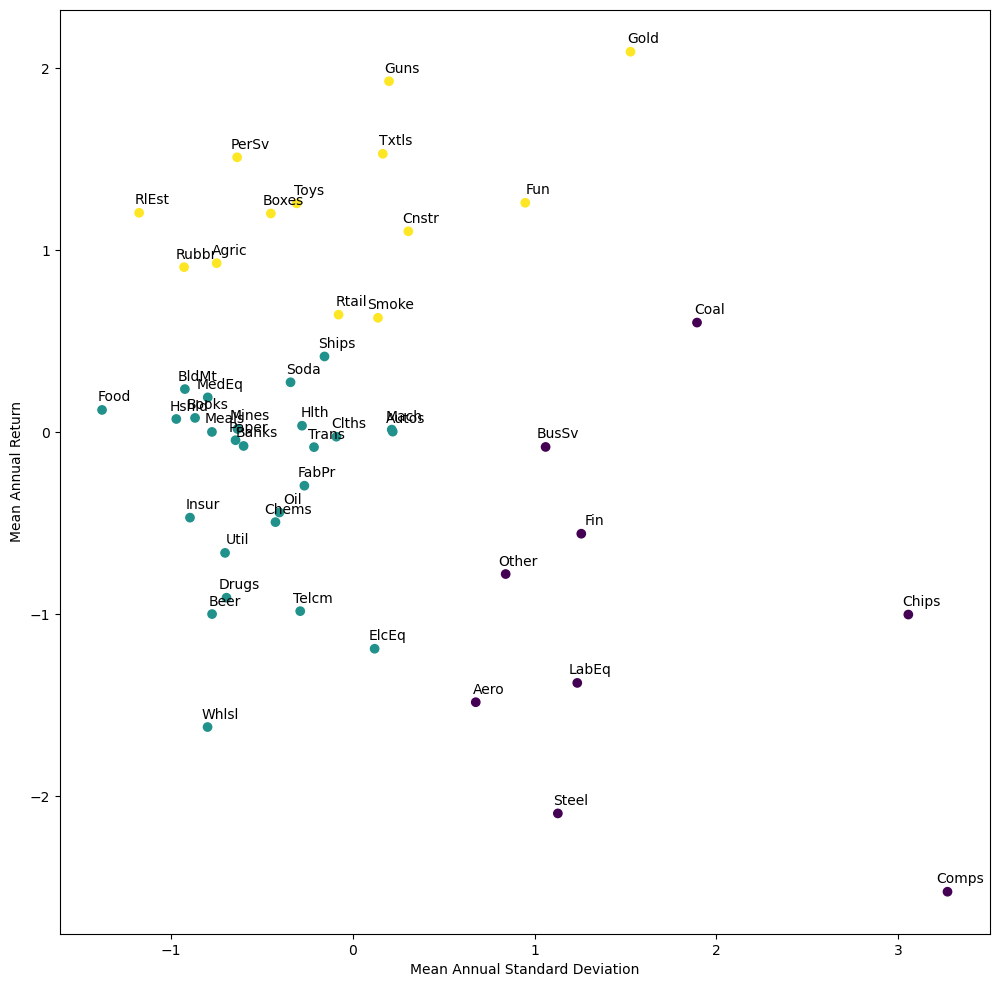

In [550]:
# 2001 (-19.8% return)
kmeans_2001 = KMeans(n_clusters=3).fit(data_2001)

# Add cluster labels to the data dataframe
data_2001['cluster'] = kmeans_2001.labels_

# Plot the mean annual return vs the mean annual standard deviation with different colors for each cluster
fig, ax = plt.subplots(figsize=(12,12))
plt.scatter(data_2001['std_dev'], data_2001['mean_return'], c=data_2001['cluster'])
plt.xlabel('Mean Annual Standard Deviation')
plt.ylabel('Mean Annual Return')

# Add labels for each point
offset = 0.07
for i, row in data_2001.iterrows():
    plt.text(row['std_dev'] + offset, row['mean_return'] + offset, i, ha='center', va='center')

plt.show()

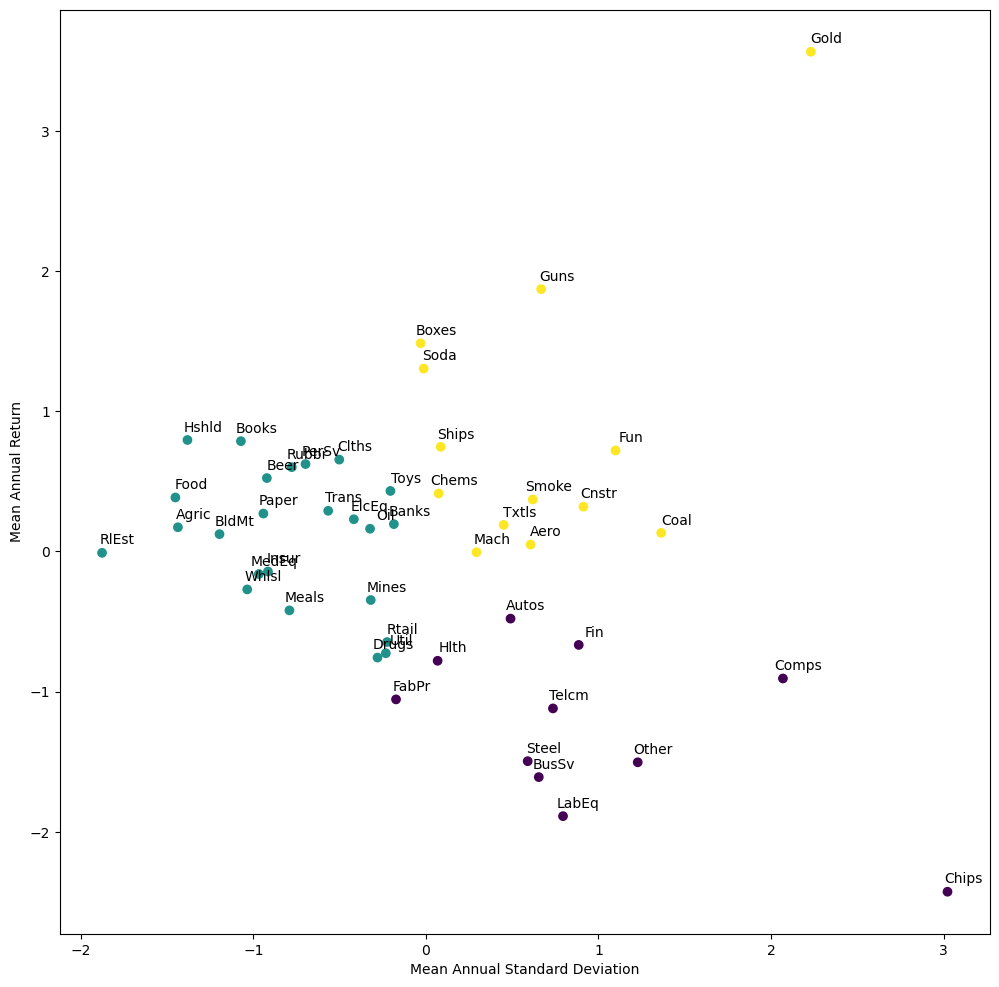

In [554]:
# 2002 (-11.2% return)
kmeans_2002 = KMeans(n_clusters=3).fit(data_2002)

# Add cluster labels to the data dataframe
data_2002['cluster'] = kmeans_2002.labels_

# Plot the mean annual return vs the mean annual standard deviation with different colors for each cluster
fig, ax = plt.subplots(figsize=(12,12))
plt.scatter(data_2002['std_dev'], data_2002['mean_return'], c=data_2002['cluster'])
plt.xlabel('Mean Annual Standard Deviation')
plt.ylabel('Mean Annual Return')

# Add labels for each point
offset = 0.09
for i, row in data_2002.iterrows():
    plt.text(row['std_dev'] + offset, row['mean_return'] + offset, i, ha='center', va='center')

plt.show()

## Lets compare bull markets: 1995 vs 1997

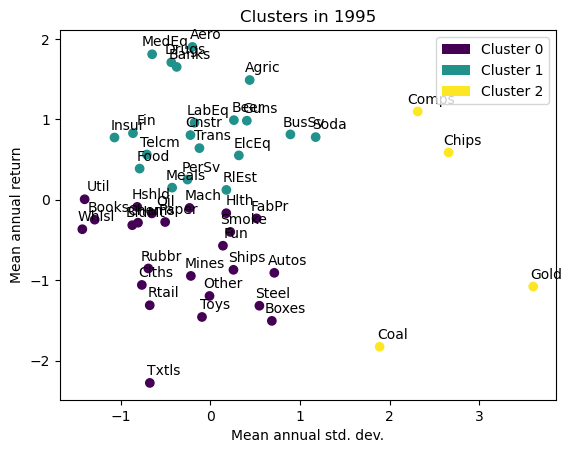

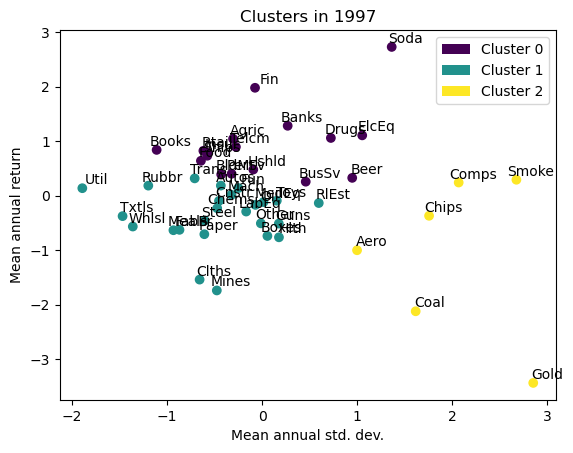

Similarity between clusterings (Adjusted Rand Index): 0.2466558336041599

Industries in clusters for 1995:
Cluster 0: Smoke, Toys, Fun, Books, Hshld, Clths, Hlth, Chems, Rubbr, Txtls, BldMt, Steel, FabPr, Mach, Autos, Ships, Mines, Oil, Util, Paper, Boxes, Whlsl, Rtail, Other
Cluster 1: Agric, Food, Soda, Beer, MedEq, Drugs, Cnstr, ElcEq, Aero, Guns, Telcm, PerSv, BusSv, LabEq, Trans, Meals, Banks, Insur, RlEst, Fin
Cluster 2: Gold, Coal, Comps, Chips

Industries in clusters for 1997:
Cluster 0: Agric, Food, Soda, Beer, Books, Hshld, Drugs, BldMt, ElcEq, Ships, Telcm, PerSv, BusSv, Rtail, Banks, Insur, Fin
Cluster 1: Toys, Fun, Clths, Hlth, MedEq, Chems, Rubbr, Txtls, Cnstr, Steel, FabPr, Mach, Autos, Guns, Mines, Oil, Util, LabEq, Paper, Boxes, Trans, Whlsl, Meals, RlEst, Other
Cluster 2: Smoke, Aero, Gold, Coal, Comps, Chips

Duplicate industries in the same clusters:
Cluster 0 in both years share industries: BldMt, Hshld, Ships, Books, Rtail
Cluster 1 in both years share industries:

In [635]:
# Lets compare bull markets: 2017 vs 2004
from sklearn.metrics import adjusted_rand_score
from matplotlib.patches import Patch
def plot_clusters(data, title):
    plt.scatter(data.iloc[:, 1], data.iloc[:, 0], c=data['cluster'], cmap='viridis')
    plt.title(title)
    plt.xlabel('Mean annual std. dev.')
    plt.ylabel('Mean annual return')

    # Create a custom legend
    unique_clusters = np.unique(data['cluster'])
    legend_elements = [Patch(facecolor=plt.cm.viridis(cluster / (len(unique_clusters) - 1)), label=f'Cluster {cluster}') for cluster in unique_clusters]
    plt.legend(handles=legend_elements, loc='upper right')

    # Add point labels
    offset = 0.15
    for i, row in data.iterrows():
        plt.text(row.iloc[1] + offset, row.iloc[0] + offset, i, ha='center', va='center')

    plt.show()

# Visualize the clusters
plot_clusters(data_1995, 'Clusters in 1995')
plot_clusters(data_1997, 'Clusters in 1997')

# Calculate similarity between the clusterings
similarity = adjusted_rand_score(data_1995['cluster'], data_1997['cluster'])
print(f"Similarity between clusterings (Adjusted Rand Index): {similarity}")

# Analyze industries in the clusters
for year, data in [('1995', data_1995), ('1997', data_1997)]:
    print(f"\nIndustries in clusters for {year}:")
    for cluster in np.unique(data['cluster']):
        industries = data[data['cluster'] == cluster].index
        print(f"Cluster {cluster}: {', '.join(industries)}")
        
def find_duplicate_industries_same_cluster(data1, data2):
    duplicate_industries = []

    for cluster in np.unique(data1['cluster']):
        industries1 = set(data1[data1['cluster'] == cluster].index)
        industries2 = set(data2[data2['cluster'] == cluster].index)

        common_industries = industries1.intersection(industries2)
        if common_industries:
            duplicate_industries.append((cluster, common_industries))

    return duplicate_industries


duplicates_same_cluster = find_duplicate_industries_same_cluster(data_1995, data_1997)
print("\nDuplicate industries in the same clusters:")
for cluster, industries in duplicates_same_cluster:
    print(f"Cluster {cluster} in both years share industries: {', '.join(industries)}")

## Lets compare bear markets: 2001 vs 2002

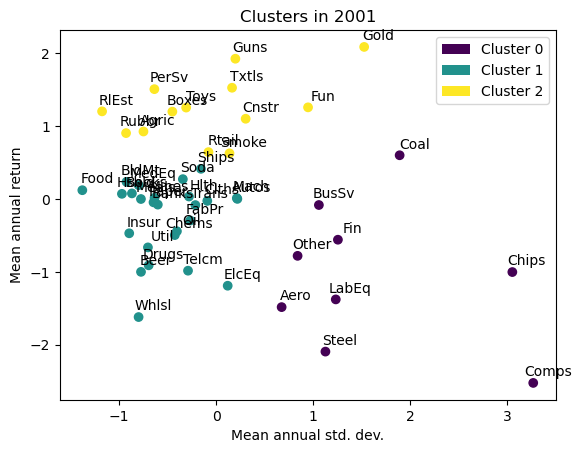

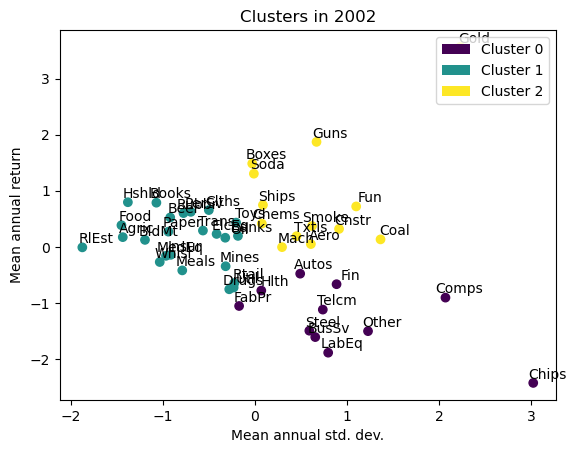

Similarity between clusterings (Adjusted Rand Index): 0.241004147682955

Industries in clusters for 2001:
Cluster 0: Steel, Aero, Coal, BusSv, Comps, Chips, LabEq, Fin, Other
Cluster 1: Food, Soda, Beer, Books, Hshld, Clths, Hlth, MedEq, Drugs, Chems, BldMt, FabPr, Mach, ElcEq, Autos, Ships, Mines, Oil, Util, Telcm, Paper, Trans, Whlsl, Meals, Banks, Insur
Cluster 2: Agric, Smoke, Toys, Fun, Rubbr, Txtls, Cnstr, Guns, Gold, PerSv, Boxes, Rtail, RlEst

Industries in clusters for 2002:
Cluster 0: Hlth, Steel, FabPr, Autos, Telcm, BusSv, Comps, Chips, LabEq, Fin, Other
Cluster 1: Agric, Food, Beer, Toys, Books, Hshld, Clths, MedEq, Drugs, Rubbr, BldMt, ElcEq, Mines, Oil, Util, PerSv, Paper, Trans, Whlsl, Rtail, Meals, Banks, Insur, RlEst
Cluster 2: Soda, Smoke, Fun, Chems, Txtls, Cnstr, Mach, Aero, Ships, Guns, Gold, Coal, Boxes

Duplicate industries in the same clusters:
Cluster 0 in both years share industries: Fin, Chips, LabEq, Other, BusSv, Steel, Comps
Cluster 1 in both years share 

In [636]:
# 2001 vs 2002

# Visualize the clusters
plot_clusters(data_2001, 'Clusters in 2001')
plot_clusters(data_2002, 'Clusters in 2002')

# Calculate similarity between the clusterings
similarity = adjusted_rand_score(data_2001['cluster'], data_2002['cluster'])
print(f"Similarity between clusterings (Adjusted Rand Index): {similarity}")

# Analyze industries in the clusters
for year, data in [('2001', data_2001), ('2002', data_2002)]:
    print(f"\nIndustries in clusters for {year}:")
    for cluster in np.unique(data['cluster']):
        industries = data[data['cluster'] == cluster].index
        print(f"Cluster {cluster}: {', '.join(industries)}")
        

duplicates_same_cluster = find_duplicate_industries_same_cluster(data_2001, data_2002)
print("\nDuplicate industries in the same clusters:")
for cluster, industries in duplicates_same_cluster:
    print(f"Cluster {cluster} in both years share industries: {', '.join(industries)}")

## Lets compare bull vs bear markets: 1997 vs 2001

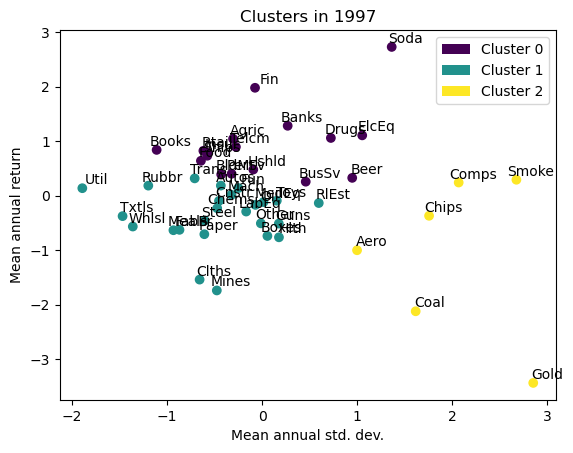

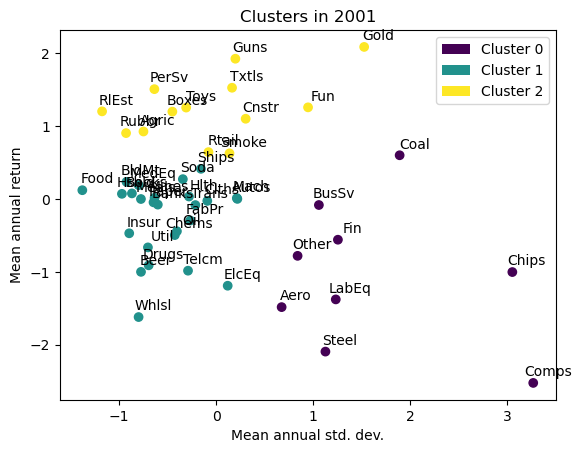

Similarity between clusterings (Adjusted Rand Index): 0.08712344269683621

Industries in clusters for 1997:
Cluster 0: Agric, Food, Soda, Beer, Books, Hshld, Drugs, BldMt, ElcEq, Ships, Telcm, PerSv, BusSv, Rtail, Banks, Insur, Fin
Cluster 1: Toys, Fun, Clths, Hlth, MedEq, Chems, Rubbr, Txtls, Cnstr, Steel, FabPr, Mach, Autos, Guns, Mines, Oil, Util, LabEq, Paper, Boxes, Trans, Whlsl, Meals, RlEst, Other
Cluster 2: Smoke, Aero, Gold, Coal, Comps, Chips

Industries in clusters for 2001:
Cluster 0: Steel, Aero, Coal, BusSv, Comps, Chips, LabEq, Fin, Other
Cluster 1: Food, Soda, Beer, Books, Hshld, Clths, Hlth, MedEq, Drugs, Chems, BldMt, FabPr, Mach, ElcEq, Autos, Ships, Mines, Oil, Util, Telcm, Paper, Trans, Whlsl, Meals, Banks, Insur
Cluster 2: Agric, Smoke, Toys, Fun, Rubbr, Txtls, Cnstr, Guns, Gold, PerSv, Boxes, Rtail, RlEst

Duplicate industries in the same clusters:
Cluster 0 in both years share industries: Fin, BusSv
Cluster 1 in both years share industries: Mines, Util, Chems, C

In [637]:
# 1997 vs 2001

# Visualize the clusters
plot_clusters(data_1997, 'Clusters in 1997')
plot_clusters(data_2001, 'Clusters in 2001')

# Calculate similarity between the clusterings
similarity = adjusted_rand_score(data_1997['cluster'], data_2001['cluster'])
print(f"Similarity between clusterings (Adjusted Rand Index): {similarity}")

# Analyze industries in the clusters
for year, data in [('1997', data_1997), ('2001', data_2001)]:
    print(f"\nIndustries in clusters for {year}:")
    for cluster in np.unique(data['cluster']):
        industries = data[data['cluster'] == cluster].index
        print(f"Cluster {cluster}: {', '.join(industries)}")
        

duplicates_same_cluster = find_duplicate_industries_same_cluster(data_1997, data_2001)
print("\nDuplicate industries in the same clusters:")
for cluster, industries in duplicates_same_cluster:
    print(f"Cluster {cluster} in both years share industries: {', '.join(industries)}")

## Lets compare bull vs bear markets: 1995 vs 2002

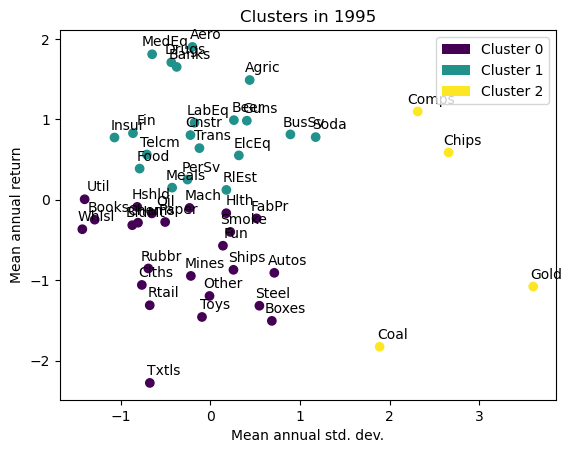

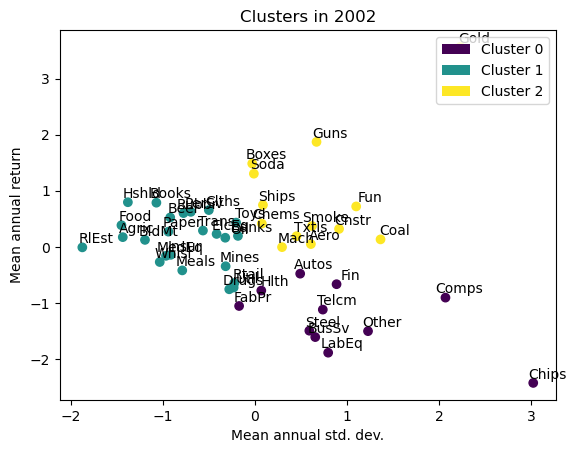

Similarity between clusterings (Adjusted Rand Index): 0.021748574889084903

Industries in clusters for 1995:
Cluster 0: Smoke, Toys, Fun, Books, Hshld, Clths, Hlth, Chems, Rubbr, Txtls, BldMt, Steel, FabPr, Mach, Autos, Ships, Mines, Oil, Util, Paper, Boxes, Whlsl, Rtail, Other
Cluster 1: Agric, Food, Soda, Beer, MedEq, Drugs, Cnstr, ElcEq, Aero, Guns, Telcm, PerSv, BusSv, LabEq, Trans, Meals, Banks, Insur, RlEst, Fin
Cluster 2: Gold, Coal, Comps, Chips

Industries in clusters for 2002:
Cluster 0: Hlth, Steel, FabPr, Autos, Telcm, BusSv, Comps, Chips, LabEq, Fin, Other
Cluster 1: Agric, Food, Beer, Toys, Books, Hshld, Clths, MedEq, Drugs, Rubbr, BldMt, ElcEq, Mines, Oil, Util, PerSv, Paper, Trans, Whlsl, Rtail, Meals, Banks, Insur, RlEst
Cluster 2: Soda, Smoke, Fun, Chems, Txtls, Cnstr, Mach, Aero, Ships, Guns, Gold, Coal, Boxes

Duplicate industries in the same clusters:
Cluster 0 in both years share industries: Other, Autos, Hlth, FabPr, Steel
Cluster 1 in both years share industries

In [640]:
# 1995 vs 2002

# Visualize the clusters
plot_clusters(data_1995, 'Clusters in 1995')
plot_clusters(data_2002, 'Clusters in 2002')

# Calculate similarity between the clusterings
similarity = adjusted_rand_score(data_1995['cluster'], data_2002['cluster'])
print(f"Similarity between clusterings (Adjusted Rand Index): {similarity}")

# Analyze industries in the clusters
for year, data in [('1995', data_1995), ('2002', data_2002)]:
    print(f"\nIndustries in clusters for {year}:")
    for cluster in np.unique(data['cluster']):
        industries = data[data['cluster'] == cluster].index
        print(f"Cluster {cluster}: {', '.join(industries)}")
        

duplicates_same_cluster = find_duplicate_industries_same_cluster(data_1995, data_2002)
print("\nDuplicate industries in the same clusters:")
for cluster, industries in duplicates_same_cluster:
    print(f"Cluster {cluster} in both years share industries: {', '.join(industries)}")
    